In [179]:
import pandas as pd
import numpy as np


import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score




In [180]:
df = pd.read_csv('SpotifyFeatures.csv')


In [181]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [182]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [183]:
df.isnull().sum() 

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [184]:
numericals = df.select_dtypes(include = np.number)
numericals

popularity  acousticness  danceability  duration_ms   energy  \
0               21       0.98600        0.3130       490867  0.23100   
1               18       0.97200        0.3600       176797  0.20100   
2               10       0.93500        0.1680       266184  0.47000   
3               17       0.96100        0.2500       288573  0.00605   
4               19       0.98500        0.1420       629760  0.05800   
...            ...           ...           ...          ...      ...   
228154          32       0.98800        0.4650       181613  0.09780   
228155          36       0.85500        0.0610       176067  0.02550   
228156          30       0.00169        0.0631       326043  0.50600   
228157          31       0.73400        0.1760       237893  0.21500   
228158          36       0.97700        0.1900       221840  0.05130   

        instrumentalness  liveness  loudness  speechiness    tempo  valence  
0               0.000431    0.0964   -14.287       0.0547   86.001   0.0886  
1               0.028000    0.1330   -19.794       0.0581  131.798   0.3690  
2               0.020400    0.3630    -8.415       0.0383   75.126   0.0696  
3               0.000000    0.1200   -33.440       0.0480   76.493   0.0380  
4               0.146000    0.0969   -23.625       0.0493  172.935   0.0382  
...                  ...       ...       ...          ...      ...      ...  
228154          0.915000    0.5340   -16.180       0.0296   75.173   0.1450  
228155          0.899000    0.0919   -22.064       0.0393   57.042   0.0321  
228156          0.172000    0.0961    -9.898       0.0357   68.014   0.0434  
228157          0.860000    0.0921   -15.586       0.0361  113.024   0.0358  
228158          0.862000    0.3090   -18.782       0.0394   82.031   0.0367  

[228159 rows x 11 columns]

In [185]:
df.genre.unique()

array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


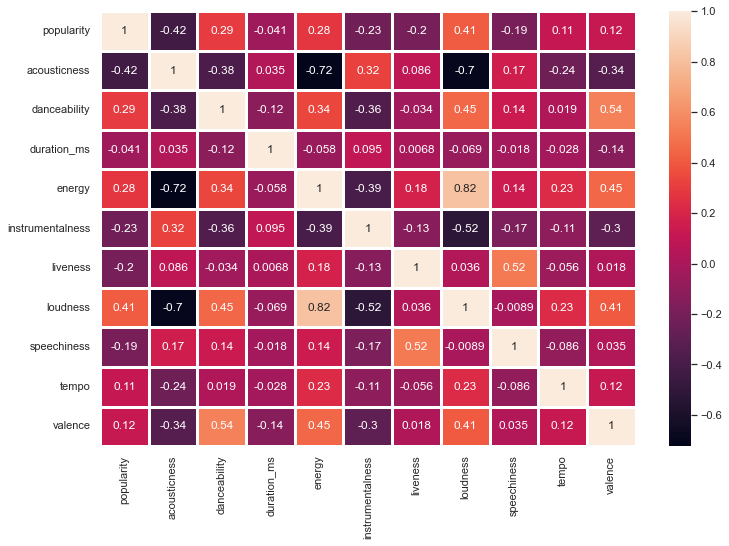

In [186]:
numericals, categoricals = numerical_features_most_related_with_popularity(df)

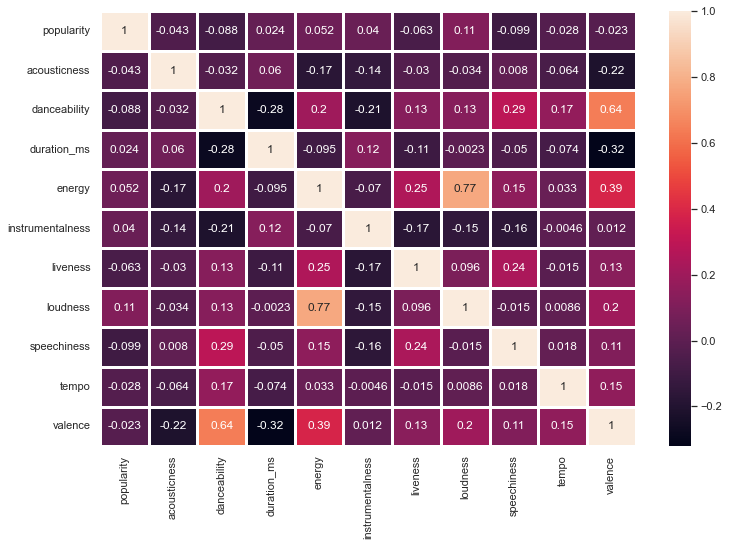

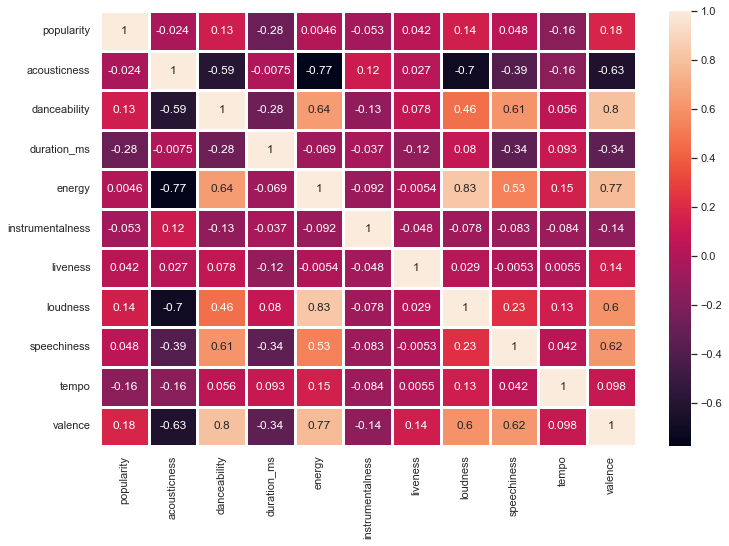

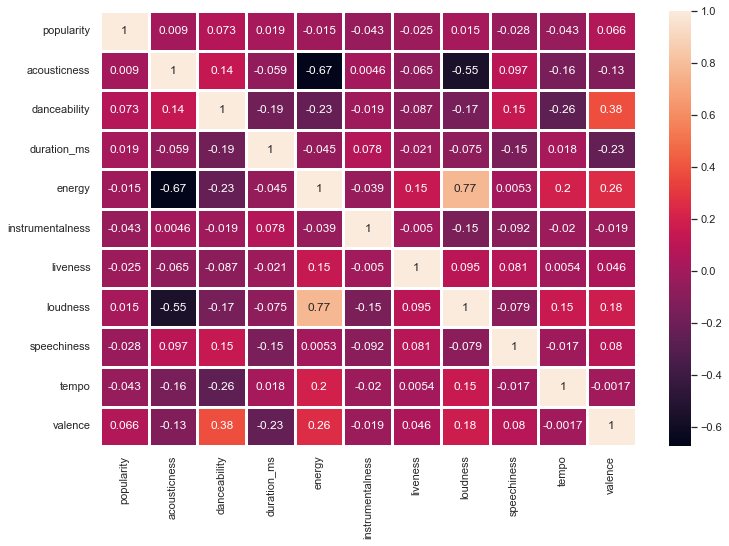

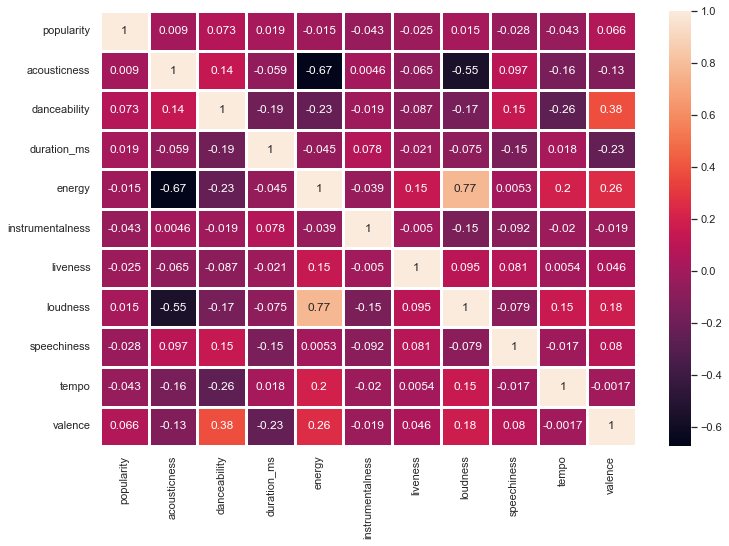

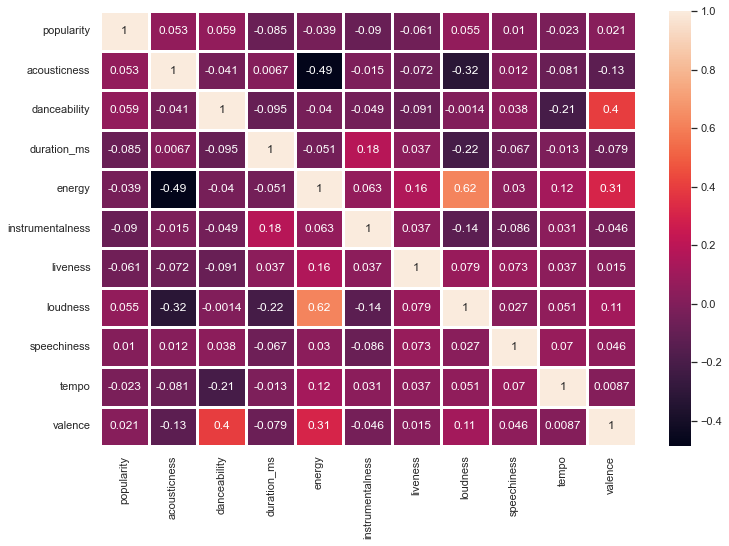

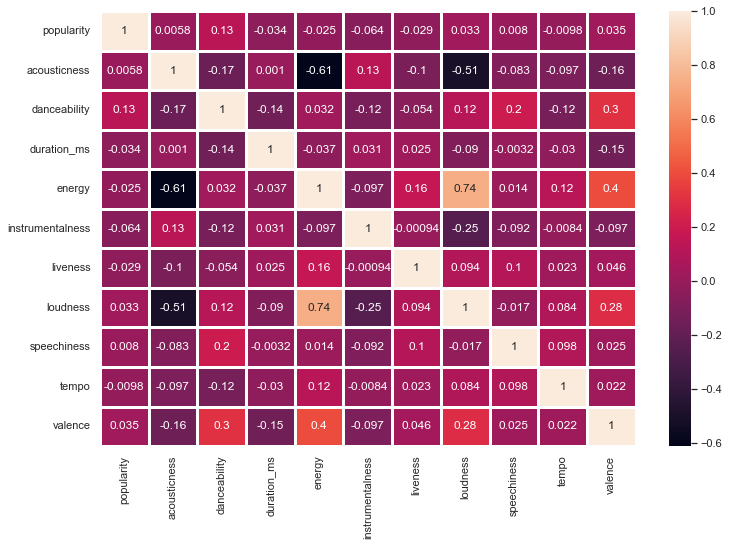

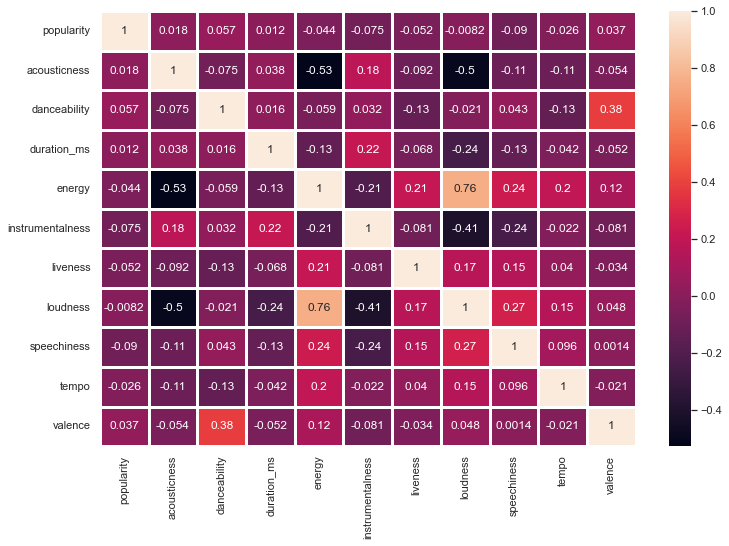

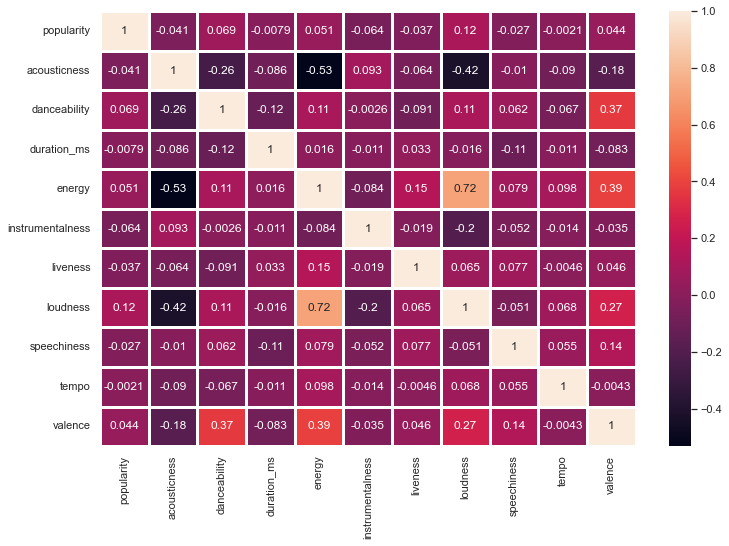

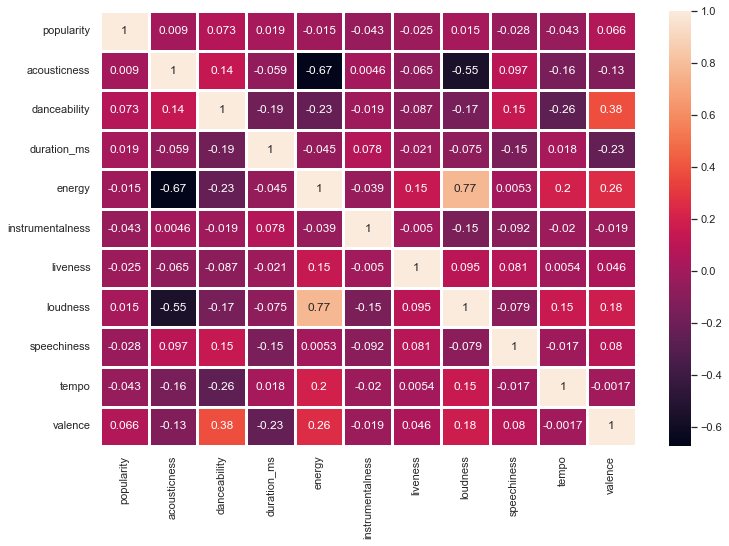

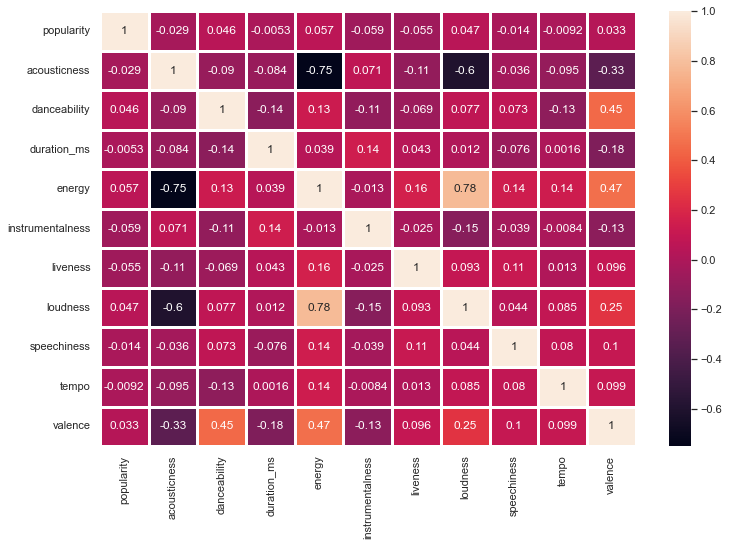

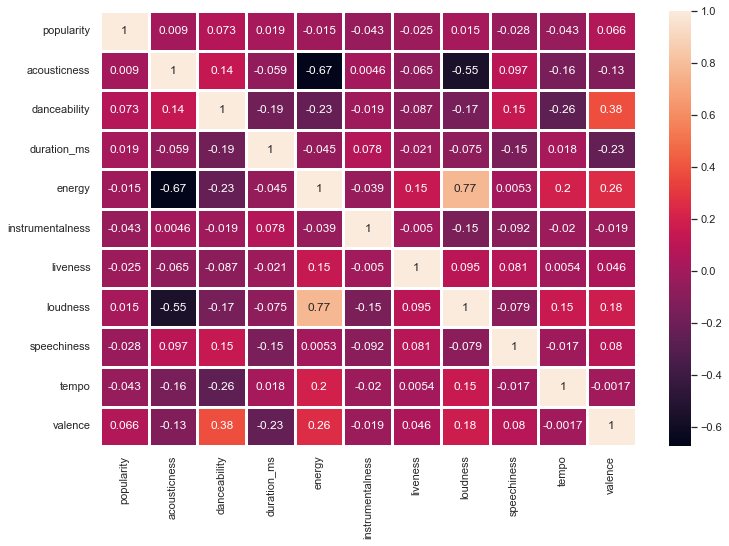

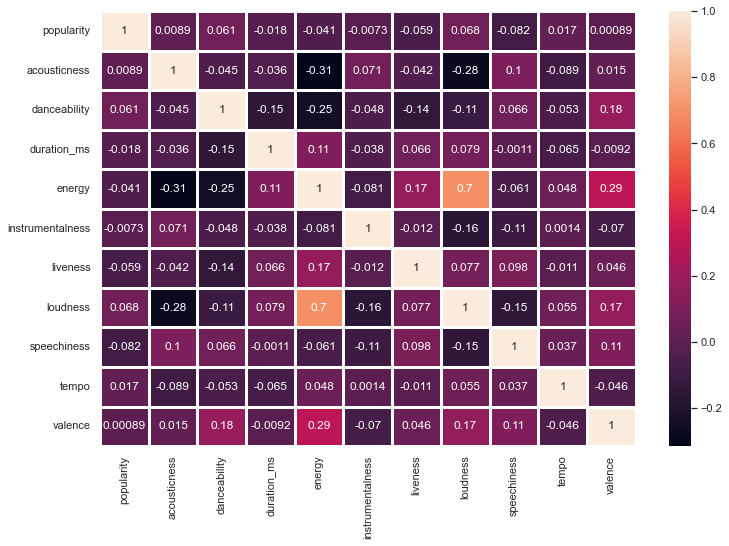

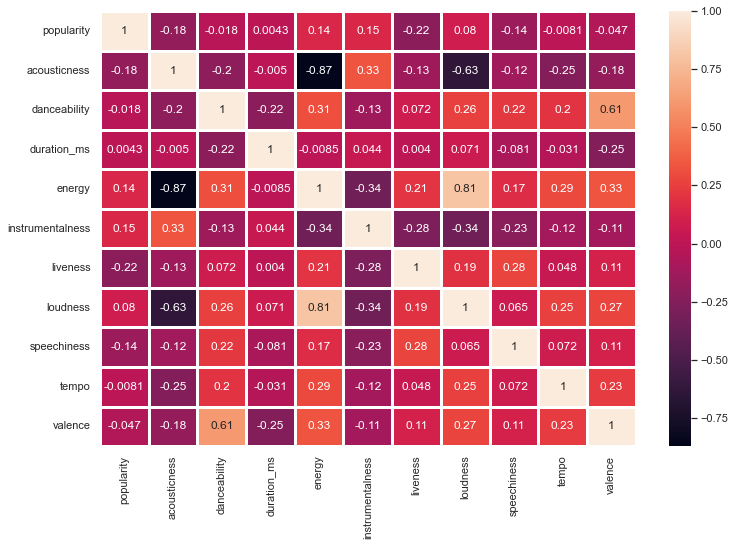

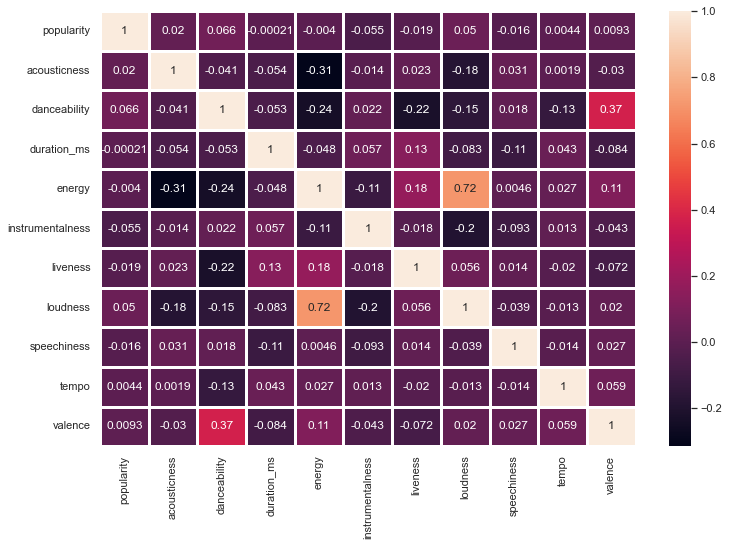

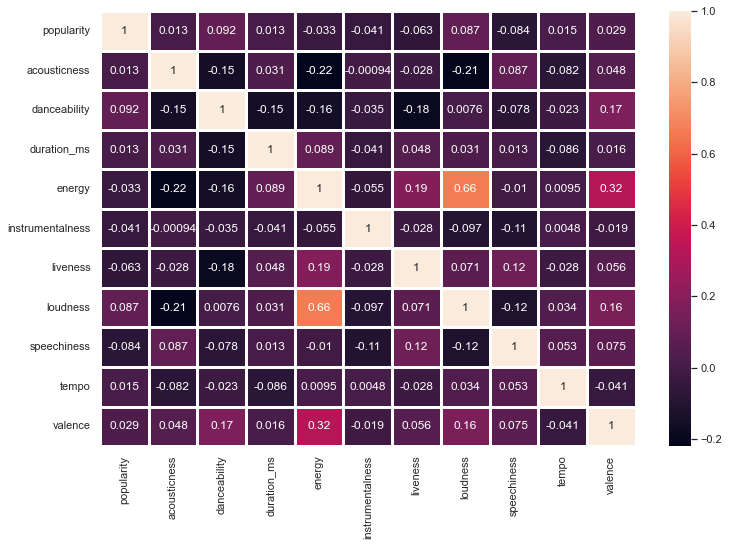

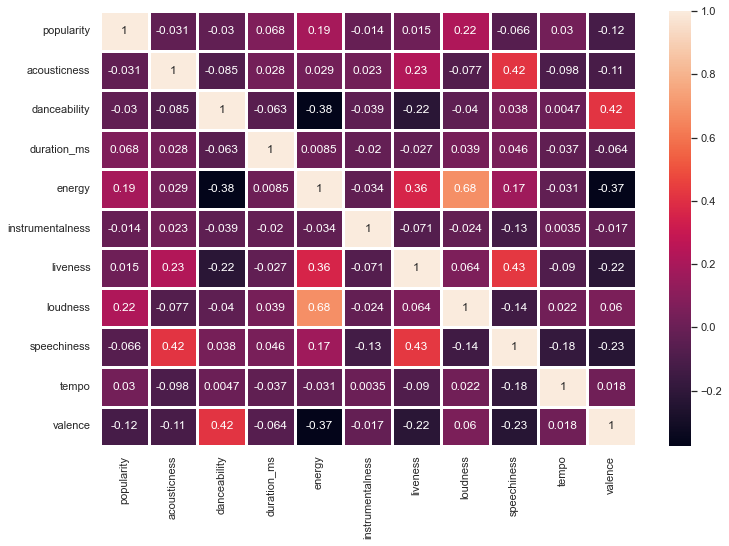

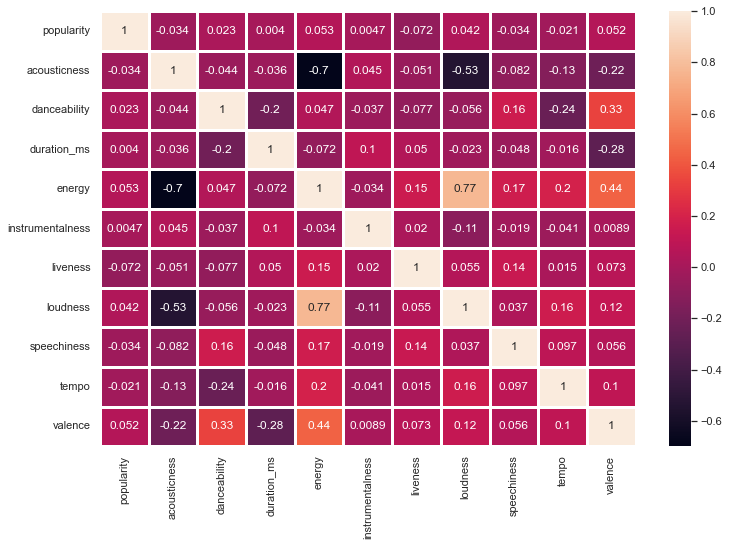

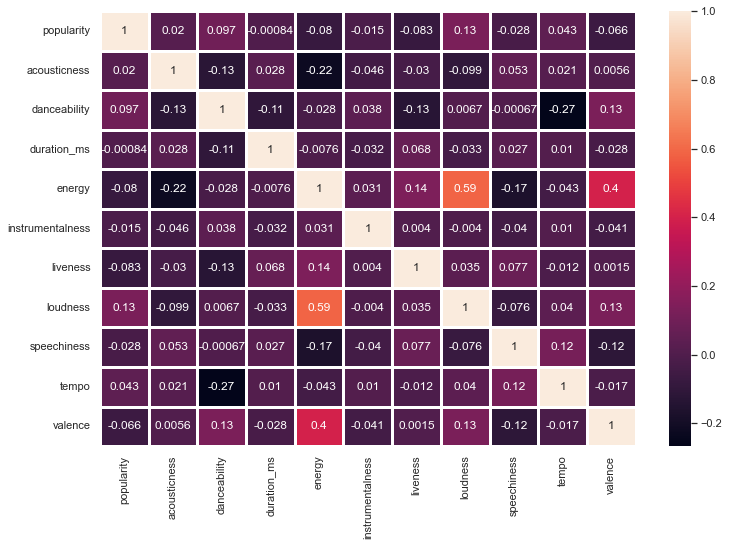

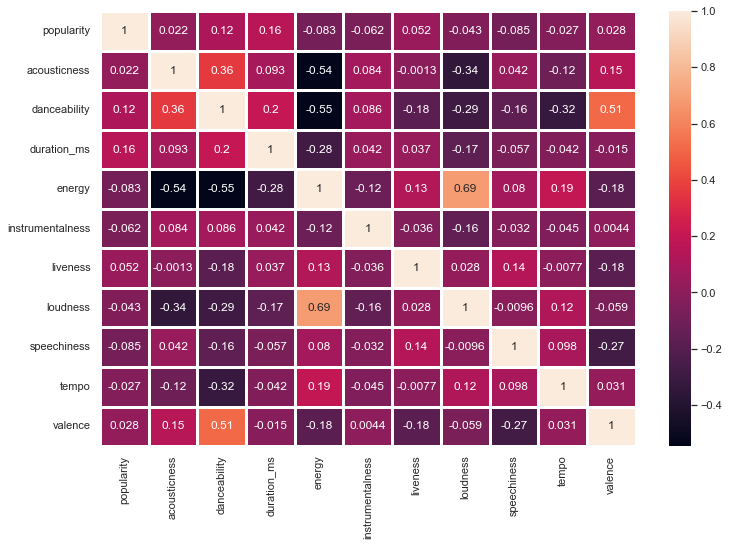

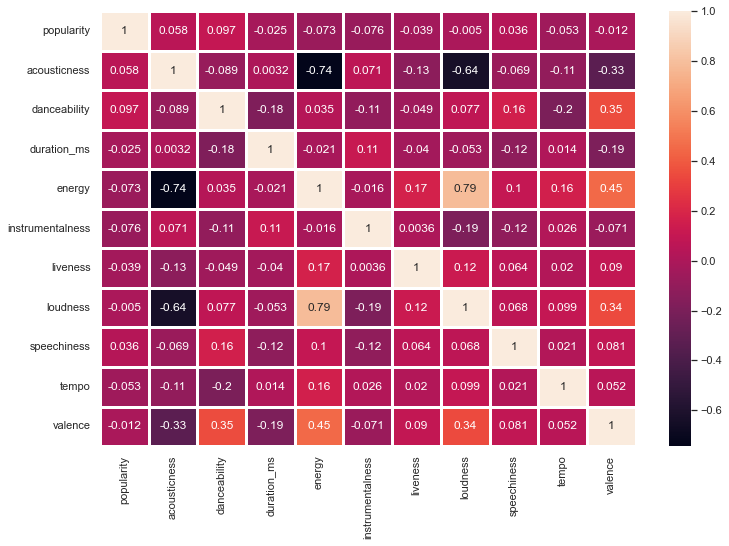

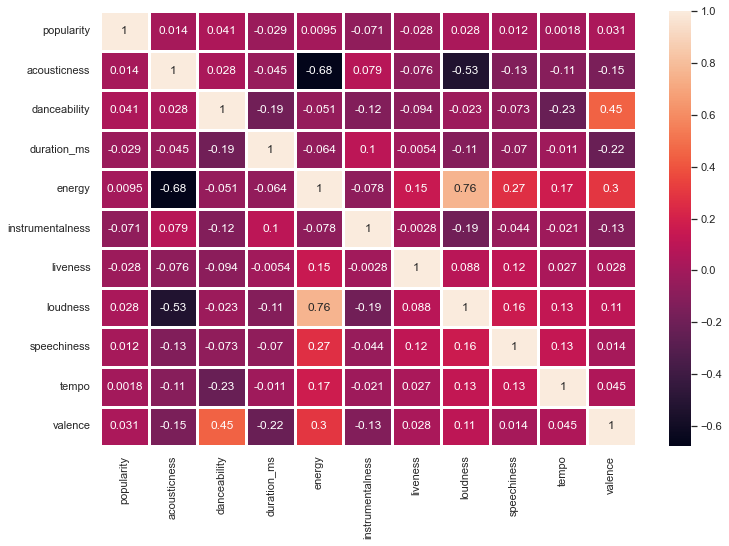

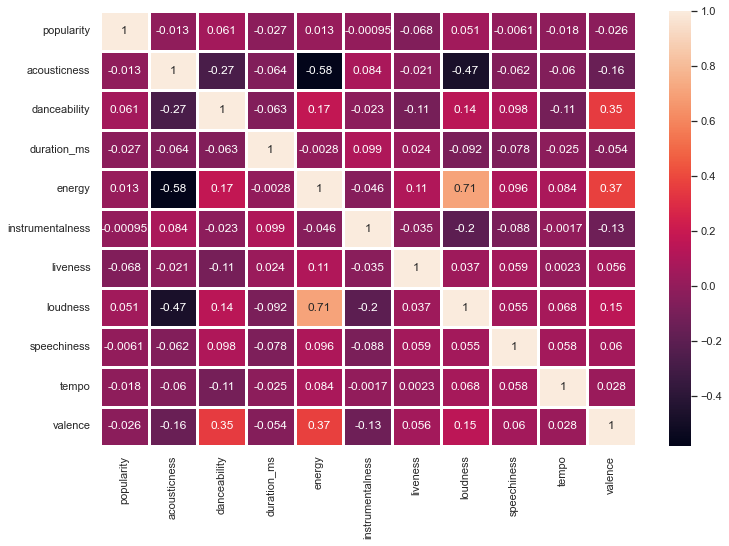

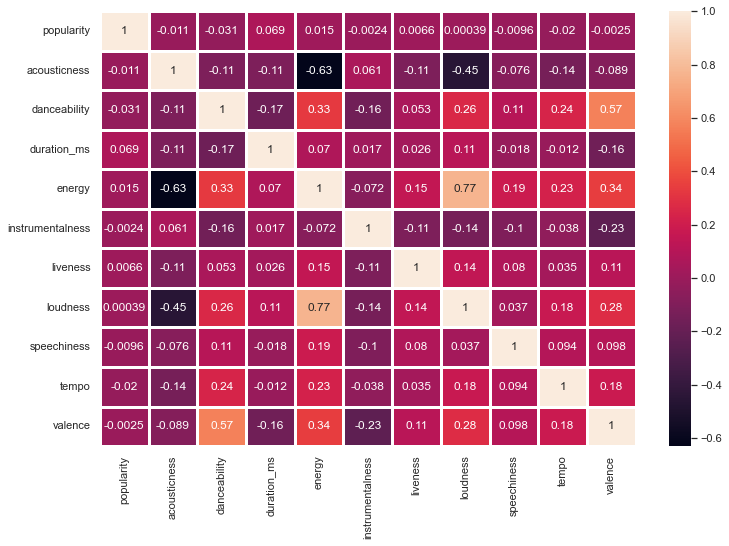

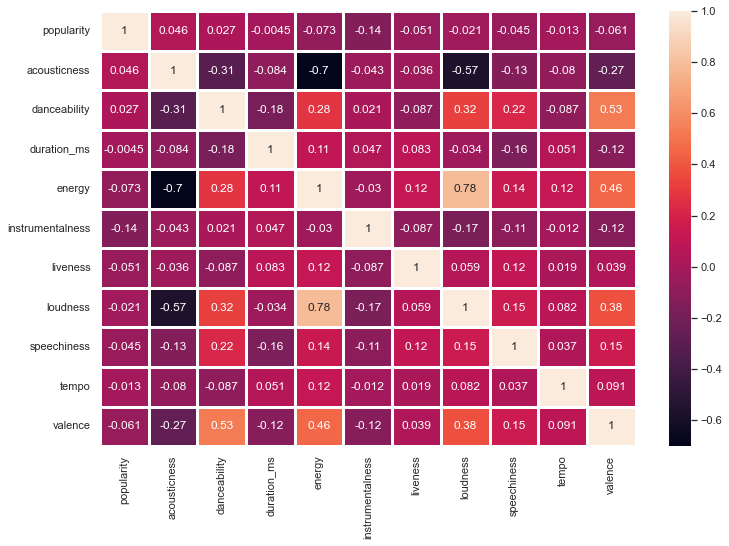

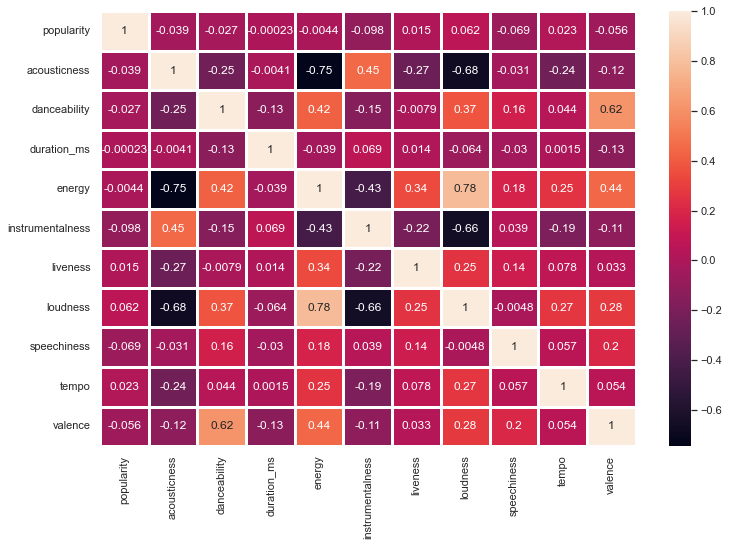

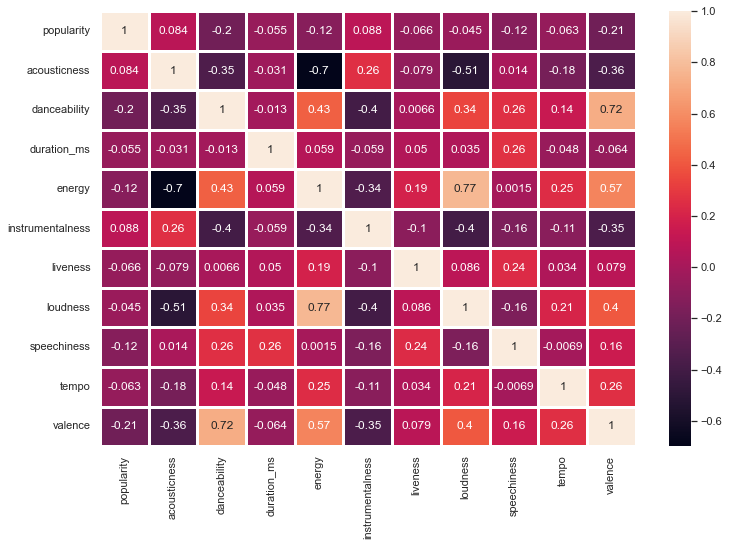

In [187]:
for i in df.genre.unique():
    numericals = df[df['genre']==i].select_dtypes(include = np.number)   
    correlations_matrix = numericals.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()

In [188]:
group_1 = ['Opera','Classical','Jazz','Soundtrack']
group_2 = ['A Capella', 'Alternative', 'R&B', 'Folk', 'Anime', 'World']
group_3 = ['Blues', 'Pop','Electronic','Rap','Reggae','Hip-Hop','Country','Ska','Indie','Rock','Soul','Movie']
group_4 = ['Reggaeton']
group_5 = ['Children’s Music']
group_6 = ['Comedy']


In [189]:
for a in group_1:
    df_group_1 = df[df['genre']==a]

for b in group_2:
    df_group_2 = df[df['genre']==b]

for c in group_3:
    df_group_3 = df[df['genre']==c]

for d in group_4:
    df_group_4 = df[df['genre']==d]

for e in group_5:
    df_group_5 = df[df['genre']==e]
    
for f in group_6:
    df_group_6 = df[df['genre']==f]

list = ['df_group_1', 'df_group_2', 'df_group_3', 'df_group_4', 'df_group_5']

In [190]:
##############################################################################################################################

# Defining functions


In [191]:
def numerical_features_most_related_with_popularity(df):
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    
    numericals = df.select_dtypes(include = np.number)
    categoricals = df.select_dtypes(include = object)
    
    correlations_matrix = numericals.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()
    
    return numericals, categoricals


In [192]:
def study_of_numerical_features_related_with_popularity(df):
    for i in list:
        sns.distplot(numericals[i],bins=150)
        plt.show()
        
    for j in list:
        sns.jointplot(x = j, y = 'popularity', data = numericals)
    

In [193]:
def eliminate_outliers_of_popularity(df, numericals):
    sns.distplot(df['popularity']).set_title('Popularity Distribution')
    plt.show()
   
    sns.boxplot(numericals['popularity'])
    plt.show()
    
    upper = np.percentile(df['popularity'],75)
    lower = np.percentile(df['popularity'],25)
    iqr = upper - lower
    upper_limit = upper + 1.5 * iqr
    lower_limit = lower - 1.5 * iqr
    df = df[(df['popularity']>lower_limit) & (df['popularity']<upper_limit)]
    
    
    numericals = df.select_dtypes(include = np.number)
    correlations_matrix = numericals.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()
    
    return upper, lower, df

In [194]:
def popularity_classification (df):

    if (df<upper):
        return 0
    elif (df>=upper):
        return 1

In [195]:
def grouping_popularity(df):
        
    numericals_test = df.select_dtypes(include = np.number)
    correlations_matrix = numericals_test.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()
    
    return numericals_test

In [196]:
def study_of_numerical_features_that_are_most_correlated(df, list):
    
    for i in list:
        g = sns.FacetGrid(numericals_test, col = "popularity")
        g.map(sns.distplot, i, bins = 25)
        plt.show() 
    

In [197]:
def study_of_categorical_features(df):
    
    graph = sns.factorplot(x = "key", y = "popularity", data = df, kind = "bar", size = 6)
    graph.set_ylabels("Popularity Probability")
    plt.show() 
    
    graph = sns.factorplot(x = "mode", y = "popularity", data = df, kind = "bar", size = 6)
    graph.set_ylabels("Popularity Probability")
    plt.show()
    
    graph = sns.factorplot(x = "time_signature", y = "popularity", data = df, kind = "bar", size = 6)
    graph.set_ylabels("Popularity Probability")
    plt.show()

In [198]:
def last_correlation_map(df):
    numericals_test = df.select_dtypes(include = np.number)
    correlations_matrix = numericals_test.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()

In [199]:
# def preparing_for_models(numericals_test):
    
#     X = numericals_test.drop(['popularity'],axis=1)
#     y = numericals_test['popularity']
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
#     transformer = StandardScaler().fit(X_train)
#     X_train_scaled = transformer.transform(X_train)
#     X_test_scaled = transformer.transform(X_test)
    
#     y_train = y_train.reset_index(drop=True)
#     y_test = y_test.reset_index(drop=True) 
    
#     return X_train_scaled, X_test_scaled, y_train, y_test


In [200]:
def logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test):
    
    LR = LogisticRegression()
    LR.fit(X_train_scaled, y_train)
#     print('score:', LR.score(X_test_scaled, y_test))
    print('accuracy:',LR.score(X_train_scaled, y_train))
          
    y_pred = LR.predict(X_test_scaled)
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))

In [201]:
def downsampling(category_0, category_1):
    
    category_0_undersampled = resample(category_0, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(category_1),
                                    random_state=0)
    
    print(category_0_undersampled.shape)
    print(category_1.shape)
    
    data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
    data_downsampled = data_downsampled.sample(frac =1) #randomize the rows
    
    X = data_downsampled.drop(['popularity'], axis = 1)
    y = data_downsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    LR = LogisticRegression(random_state=0, solver='lbfgs')
    LR.fit(X_train_scaled, y_train)
    
    print('accuracy:',LR.score(X_train_scaled, y_train))

    y_pred = LR.predict(X_test_scaled)
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))

In [202]:
def upsampling(category_0, category_1):
    
    category_1_upsampled = resample(category_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(category_0),#<- make both sets the same size
                                    random_state=0)
    
    print(category_1_upsampled.shape)
    print(category_0.shape)
    
    data_upsampled = pd.concat([category_1_upsampled, category_0], axis=0)
    data_upsampled = data_upsampled.sample(frac =1) #randomize the rows
    
    X = data_upsampled.drop(['popularity'], axis = 1)
    y = data_upsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    LR = LogisticRegression(random_state=0, solver='lbfgs')
    LR.fit(X_train_scaled, y_train)
    
    print('accuracy:',LR.score(X_train_scaled, y_train))
    
    y_pred = LR.predict(X_test_scaled)
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))


In [203]:
def get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test):
    
    max_depth_choices= [3,4,5,None]
    # criterion_choices = ['mse','mae']
    min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
    min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
    max_features_choices = [2,3,4,5,6]



    random_grid = {'max_depth': max_depth_choices,
                   #'criterion': criterion_choices,
                   'min_samples_split': min_samples_split_choices,
                   'min_samples_leaf': min_samples_leaf_choices,
                   'max_features': max_features_choices}
    
    random_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid,  n_iter=25, cv = 5, n_jobs = 10)
    
    random_search.fit(X_train_scaled,y_train)
    
    print(random_search.best_params_)
    
    random_search.best_score_
    

In [204]:
def execute_Random_Forest(a,b,c,d, X_train_scaled, X_test_scaled, y_train, y_test):
    
    clf = RandomForestClassifier(max_depth=None,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))


In [205]:
def execute_Random_Forest_downsampling(a,b,c,d, category_0, category_1):
    
    clf = RandomForestClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
    

    category_0_undersampled = resample(category_0, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(category_1),
                                    random_state=0)
    
    print(category_0_undersampled.shape)
    print(category_1.shape)
    
    data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
    data_downsampled = data_downsampled.sample(frac =1) #randomize the rows
    
    X = data_downsampled.drop(['popularity'], axis = 1)
    y = data_downsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [206]:
def execute_Random_Forest_upsampling(a,b,c,d, category_0, category_1):
    
    clf = RandomForestClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
        
    category_1_upsampled = resample(category_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(category_0),#<- make both sets the same size
                                    random_state=0)
    
    print(category_1_upsampled.shape)
    print(category_0.shape)
    
    data_upsampled = pd.concat([category_1_upsampled, category_0], axis=0)
    data_upsampled = data_upsampled.sample(frac =1) #randomize the rows
    
    X = data_upsampled.drop(['popularity'], axis = 1)
    y = data_upsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))


    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [207]:
def get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test):
    
    max_depth_choices= [3,4,5,None]
    # criterion_choices = ['mse','mae']
    min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
    min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
    max_features_choices = [2,3,4,5,6]



    random_grid = {'max_depth': max_depth_choices,
                   #'criterion': criterion_choices,
                   'min_samples_split': min_samples_split_choices,
                   'min_samples_leaf': min_samples_leaf_choices,
                   'max_features': max_features_choices}
    
    random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions = random_grid,  n_iter=25, cv = 5, n_jobs = 10)
    
    random_search.fit(X_train_scaled,y_train)
    
    print(random_search.best_params_)
    
    random_search.best_score_

In [208]:
def execute_Decision_tree_classifier(a,b,c,d, X_train_scaled, X_test_scaled, y_train, y_test):
    
    clf = DecisionTreeClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [209]:
def execute_Decision_tree_classifier_downsampling(a,b,c,d, category_0, category_1):
    
    clf = DecisionTreeClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)

    category_0_undersampled = resample(category_0, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(category_1),
                                    random_state=0)
    
    print(category_0_undersampled.shape)
    print(category_1.shape)
    
    data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
    data_downsampled = data_downsampled.sample(frac =1) #randomize the rows
    
    X = data_downsampled.drop(['popularity'], axis = 1)
    y = data_downsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [210]:
def execute_Decision_tree_classifier_upsampling(a,b,c,d, category_0, category_1):
    
    clf = DecisionTreeClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
        
    category_1_upsampled = resample(category_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(category_0),#<- make both sets the same size
                                    random_state=0)
    
    print(category_1_upsampled.shape)
    print(category_0.shape)
    
    data_upsampled = pd.concat([category_1_upsampled, category_0], axis=0)
    data_upsampled = data_upsampled.sample(frac =1) #randomize the rows
    
    X = data_upsampled.drop(['popularity'], axis = 1)
    y = data_upsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [211]:
##############################################################################################################################

# Looking at group 1

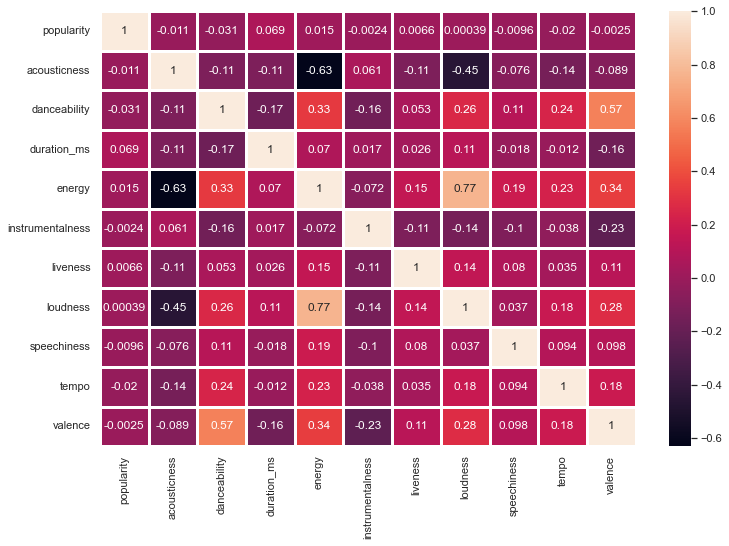

In [212]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_1)

## Studying the numerical features that are mostly related with popularity

In [213]:
list = ['danceability','energy','instrumentalness','loudness']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


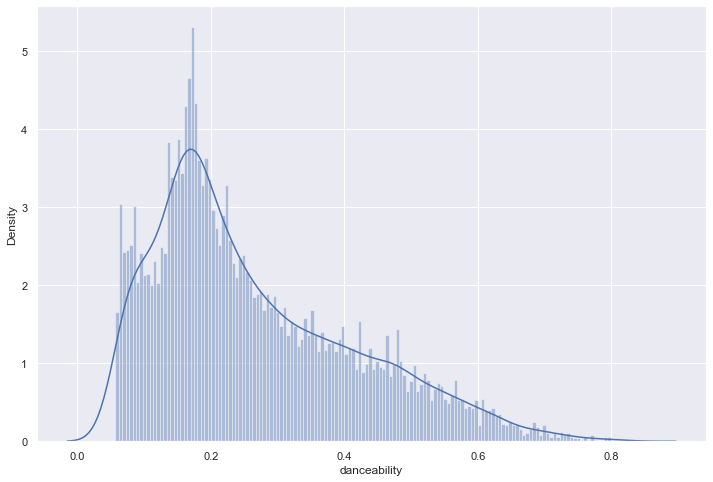

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


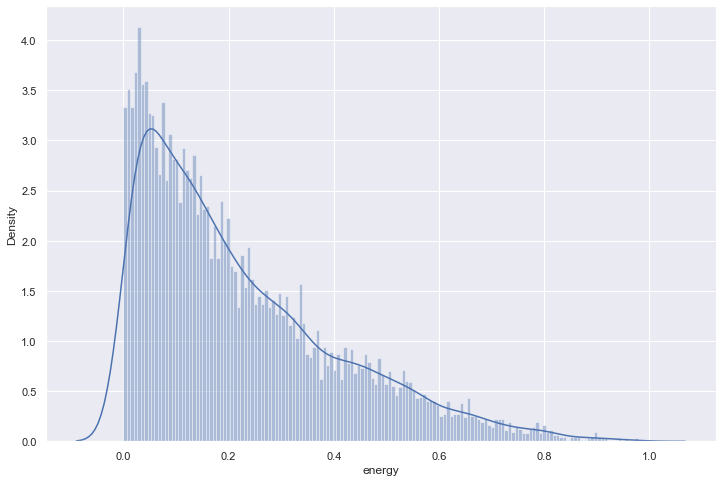

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


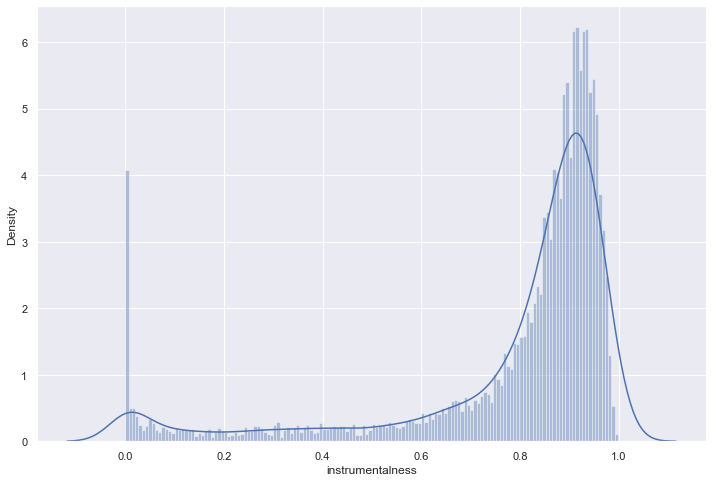

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


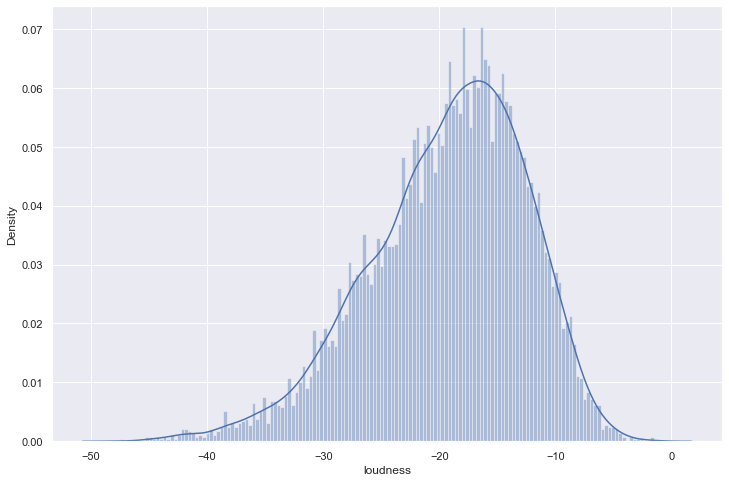

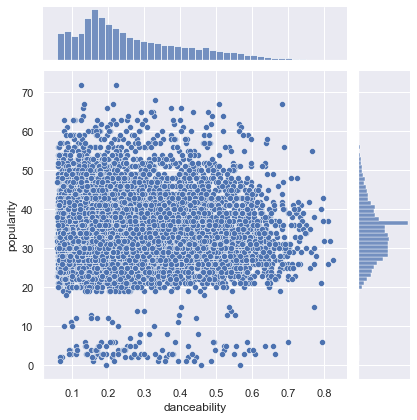

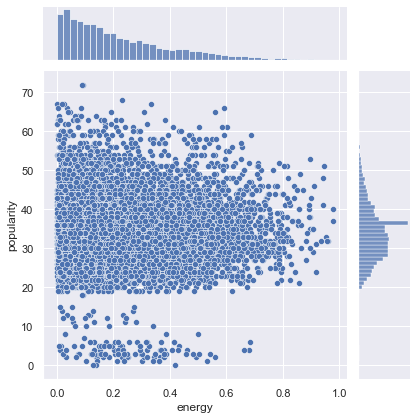

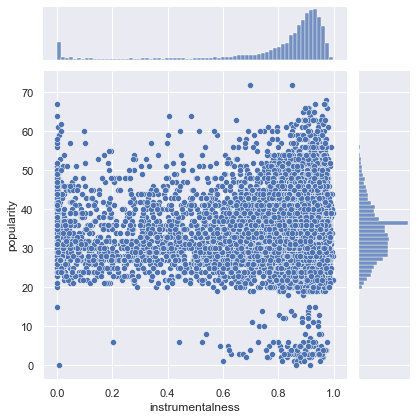

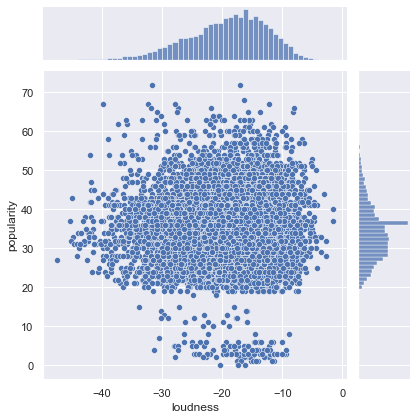

In [214]:
study_of_numerical_features_related_with_popularity(df_group_1)

## Looking more closely at popularity

### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


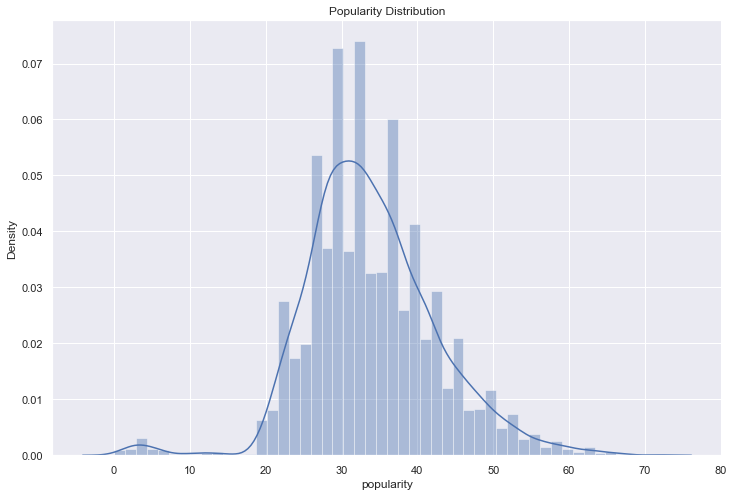

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


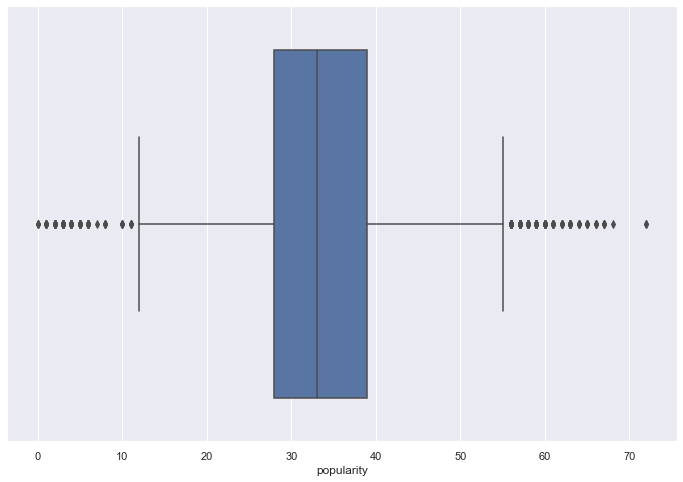

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


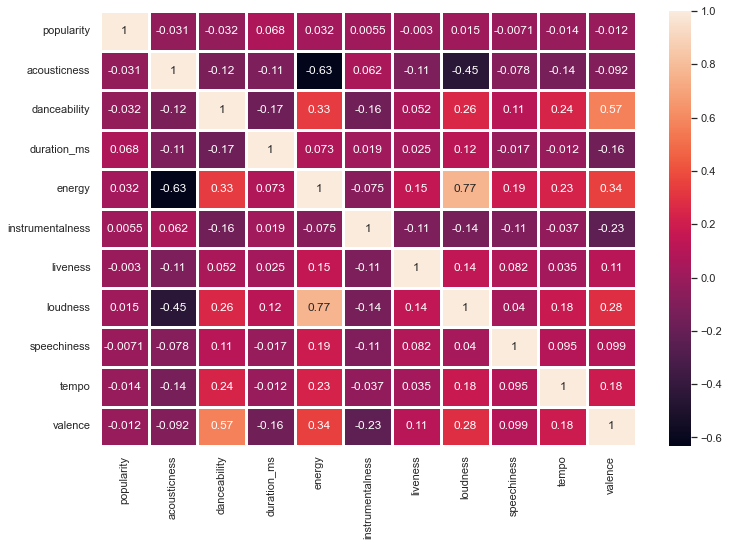

In [215]:
upper, lower, df_group_1 = eliminate_outliers_of_popularity(df_group_1, numericals)

In [216]:
upper

39.0

In [217]:
# Improvement can be seen in the correlation with population as a whole

### Grouping popularity

In [218]:
# df_group_1_test = df_group_1.copy()

In [219]:
df_group_1['popularity'] = df_group_1['popularity'].apply(popularity_classification)


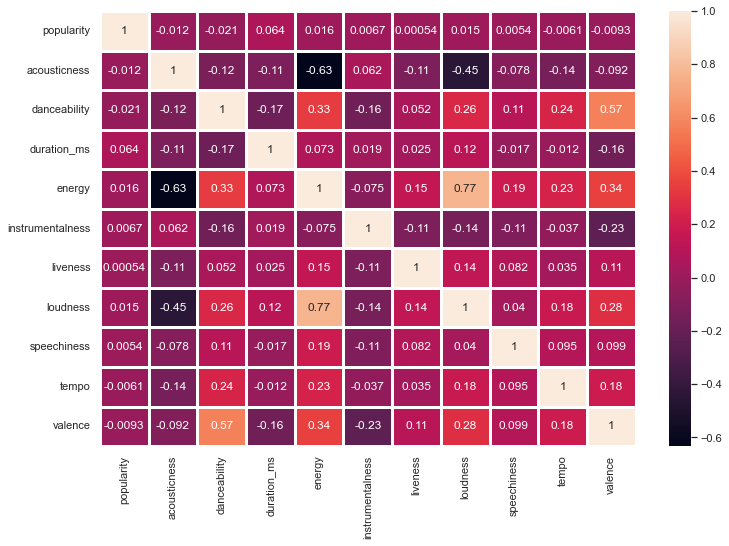

In [220]:
numericals_test = grouping_popularity(df_group_1)

In [221]:
# There is the same correlation for group 1 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


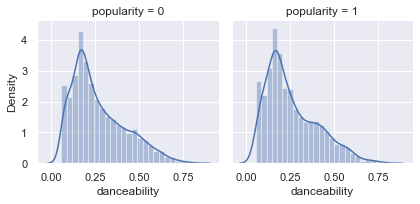

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


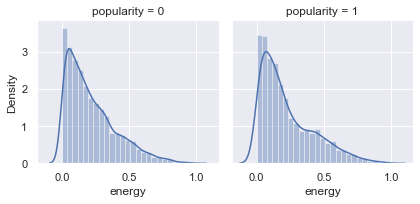

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


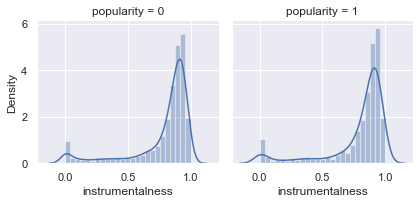

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


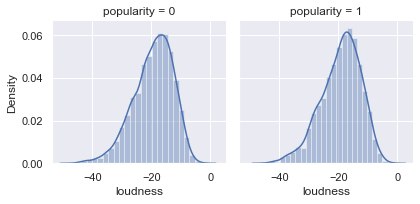

In [222]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


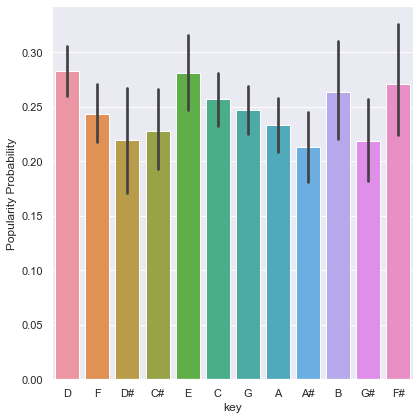

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


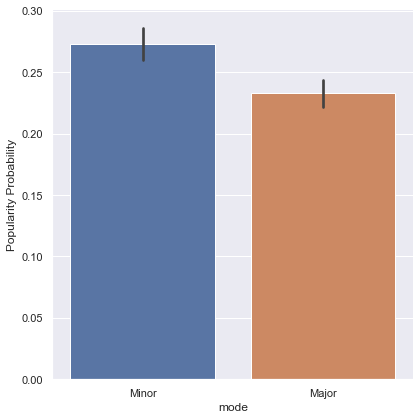

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


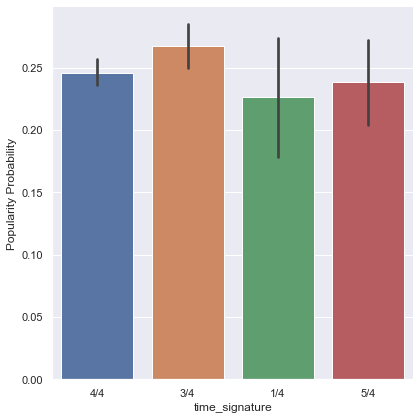

In [223]:
study_of_categorical_features(df_group_1)

In [224]:
df_group_1["key"] = (df_group_1["key"].map({"D" : 10, "F" : 6, "D#" : 2, "C#" : 4, "E" : 12, "C" : 8, "G" : 7, "A" : 5, "A#" : 1, "B" : 9, "G#" : 3, "F#" : 11})).astype('float')
df_group_1["mode"] = (df_group_1["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
df_group_1["time_signature"] = (df_group_1["time_signature"].map({"4/4" : 3, "3/4" : 4, "1/4" : 2, "5/4" : 1})).astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


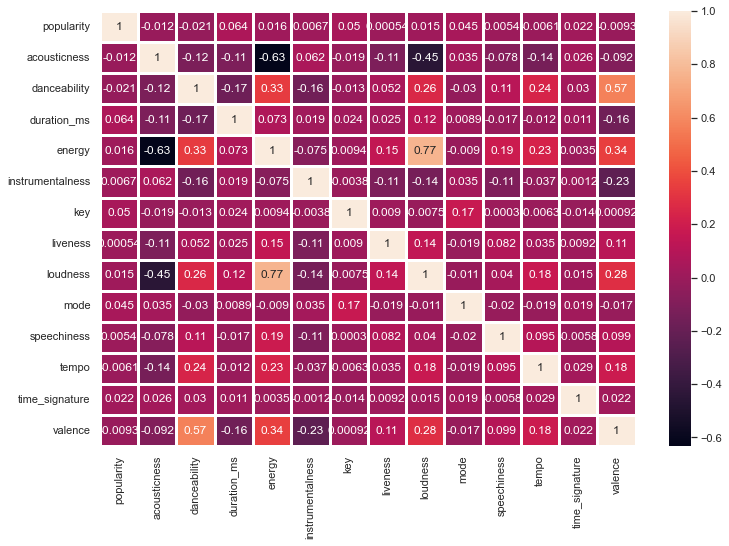

In [225]:
last_correlation_map(df_group_1)

Data distribution of songs in group 1 ('Opera','Classical','Jazz','Soundtrack') show that features like dancebility, energy, instrumentalness, loudness and tempo have an influence.


### Modelling group 1

In [226]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression

In [227]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7491115849324804
precision:  0.0
recall:  0.0
[[1757    1]
 [ 587    0]]


In [228]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [229]:
downsampling(category_0, category_1)

(2351, 11)
(2351, 11)
accuracy: 0.5465116279069767
precision:  0.5324675324675324
recall:  0.4019607843137255
[[348 216]
 [366 246]]


###### Upsampling

In [230]:
upsampling(category_0, category_1)

(7029, 11)
(7029, 11)
accuracy: 0.5299250687660059
precision:  0.5632107023411371
recall:  0.47197309417040356
[[1078  653]
 [ 942  842]]


#### Random Forest Classifier


In [231]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 2, 'max_depth': None}


In [232]:
execute_Random_Forest(2,9,4,None,X_train_scaled, X_test_scaled, y_train, y_test)

0.769864960909737


0    1758
1     587
Name: popularity, dtype: int64

precision:  0.25
recall:  0.0017035775127768314


array([[1755,    3],
       [ 586,    1]], dtype=int64)

###### Downsampling 

In [233]:
execute_Random_Forest_downsampling(2,9,4,None, category_0, category_1)

(2351, 11)
(2351, 11)
0.9359047078842881


0    597
1    579
Name: popularity, dtype: int64

precision:  0.52
recall:  0.538860103626943


array([[309, 288],
       [267, 312]], dtype=int64)

###### Upsampling 

In [234]:
execute_Random_Forest_upsampling(2,9,4,None, category_0, category_1)

(7029, 11)
(7029, 11)
0.9719244996680262


1    1763
0    1752
Name: popularity, dtype: int64

precision:  0.8113207547169812
recall:  0.8536585365853658


array([[1402,  350],
       [ 258, 1505]], dtype=int64)

#### Decision Tree Classifier


In [235]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 3}


In [236]:
execute_Decision_tree_classifier(4,2,6,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7495380241648898


0    1758
1     587
Name: popularity, dtype: int64

precision:  0.0
recall:  0.0


array([[1755,    3],
       [ 587,    0]], dtype=int64)

###### Downsampling 

In [237]:
execute_Decision_tree_classifier_downsampling(4,2,6,3, category_0, category_1)

(2351, 11)
(2351, 11)
0.5601247872943845


0    591
1    585
Name: popularity, dtype: int64

precision:  0.5285505124450952
recall:  0.6170940170940171


array([[269, 322],
       [224, 361]], dtype=int64)

###### Upsampling 

In [238]:
execute_Decision_tree_classifier_upsampling(4,2,6,3, category_0, category_1)

(7029, 11)
(7029, 11)
0.5660627904770938


0    1770
1    1745
Name: popularity, dtype: int64

precision:  0.5481991525423728
recall:  0.5931232091690545


array([[ 917,  853],
       [ 710, 1035]], dtype=int64)

In [239]:
# Conclusion: For group 1 we take the Random Forest Upsampling

# Looking at group 2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


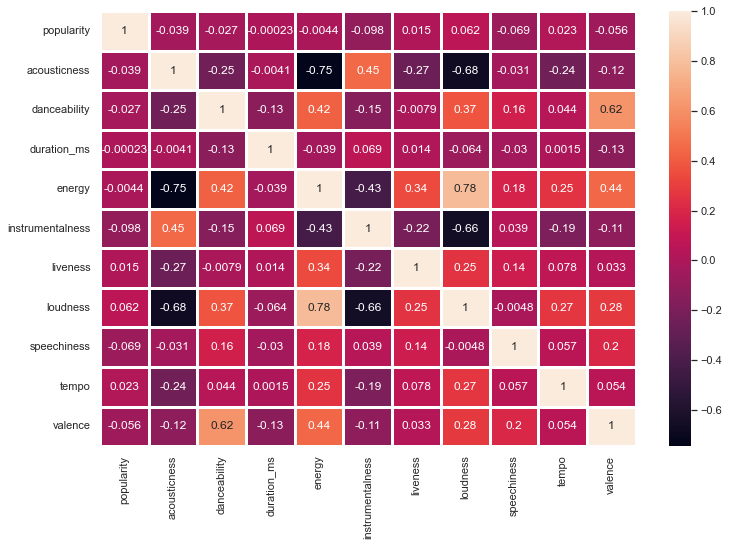

In [240]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_2)

## Studying the numerical features that are mostly related with popularity

In [241]:
list = ['danceability','energy','loudness','speechiness']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


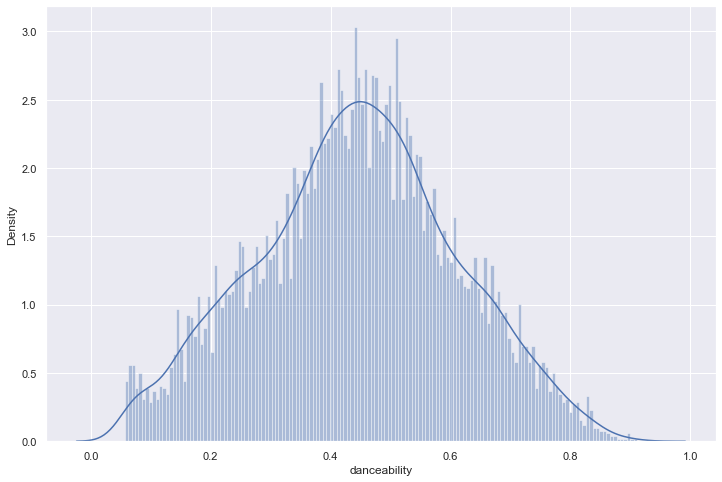

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


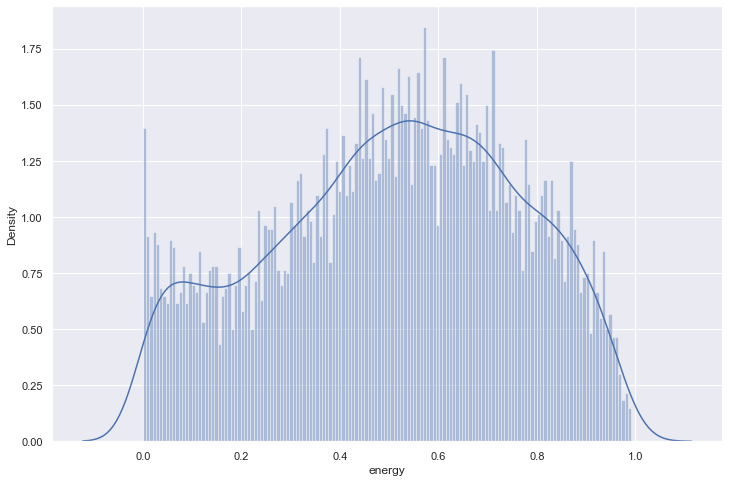

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


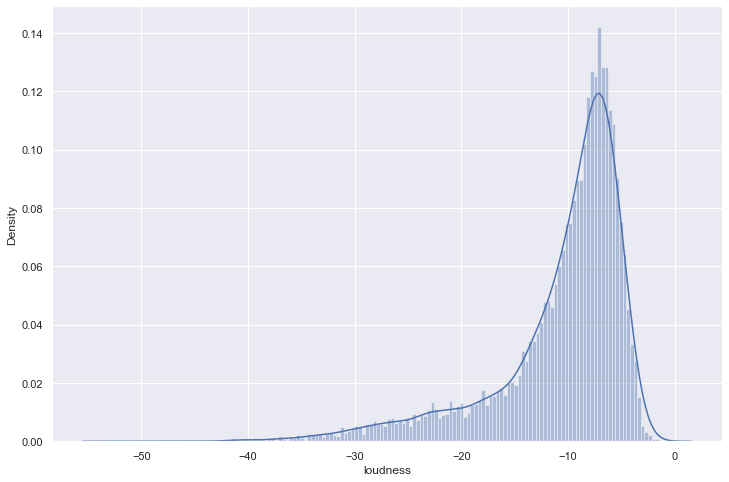

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


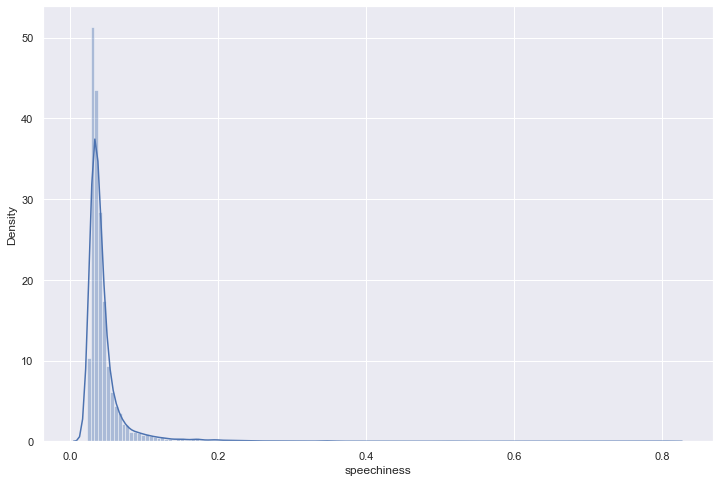

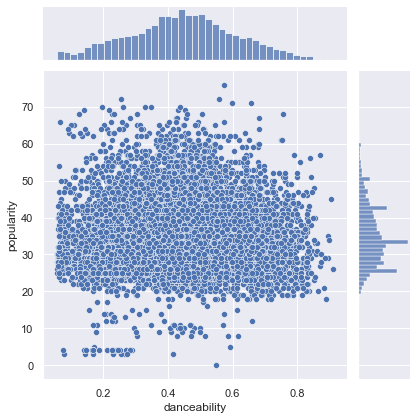

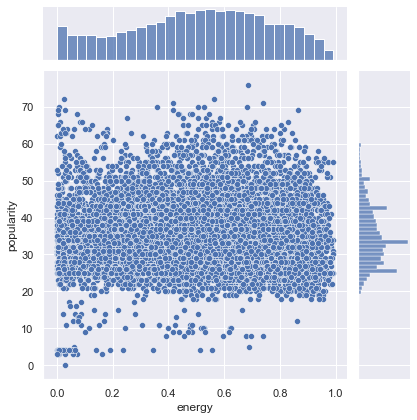

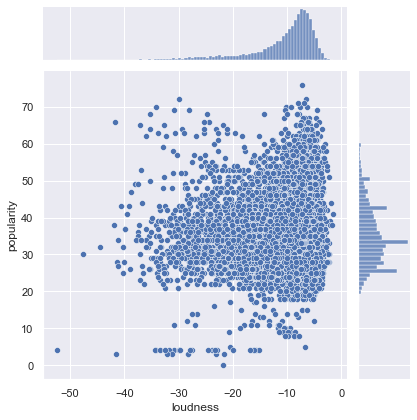

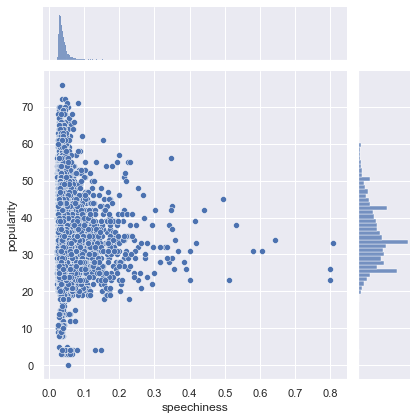

In [242]:
study_of_numerical_features_related_with_popularity(df_group_2)

## Looking more closely at popularity


### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


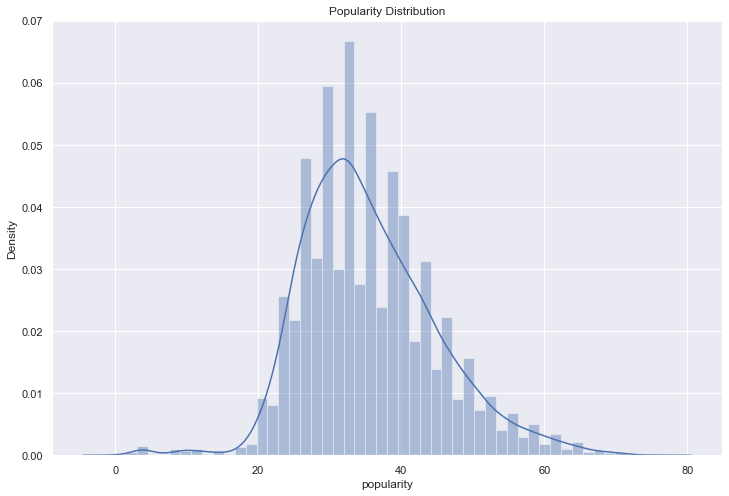

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


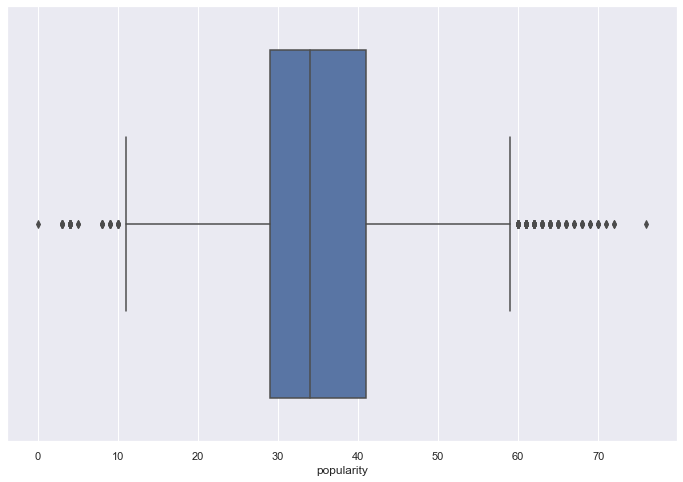

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


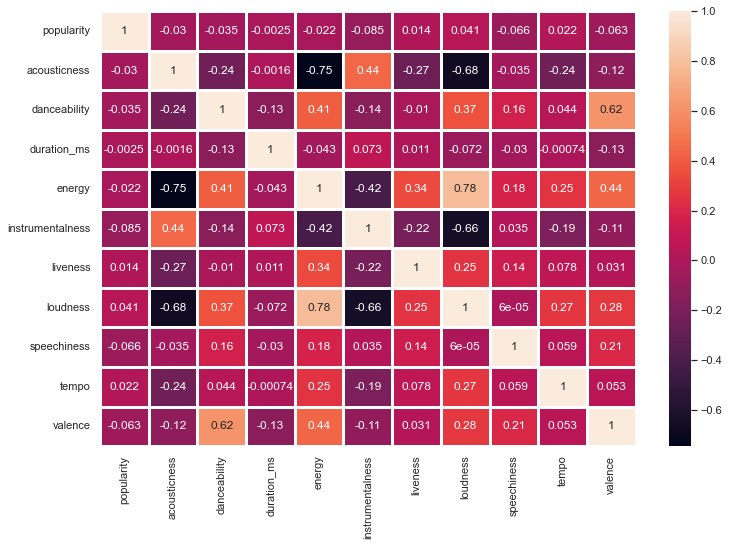

In [243]:
df_group_2_unnecesary = df_group_2.copy()
upper, lower, df_group_2_unnecesary = eliminate_outliers_of_popularity(df_group_2, numericals)

In [244]:
upper

41.0

In [245]:
# No improvement can be seen in the correlation

### Grouping popularity

In [246]:
# df_group_2_test = df_group_2.copy()

In [247]:
df_group_2['popularity'] = df_group_2['popularity'].apply(popularity_classification)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/475881809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_2['popularity'] = df_group_2['popularity'].apply(popularity_classification)


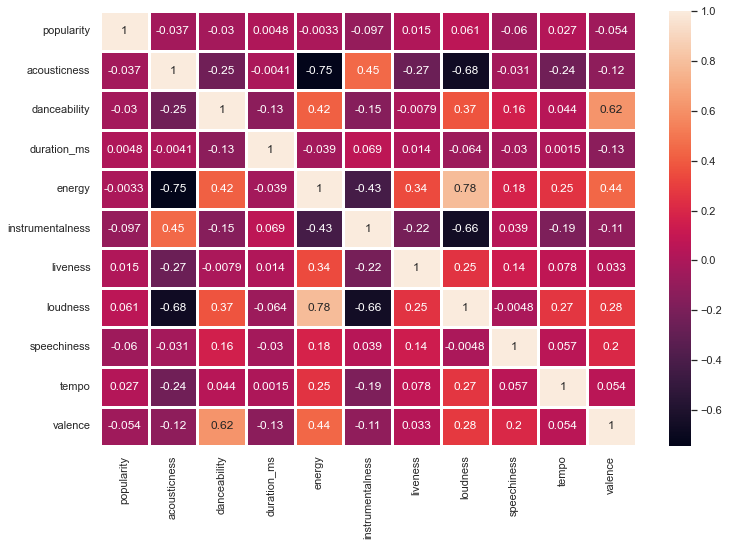

In [248]:
numericals_test = grouping_popularity(df_group_2)

In [249]:
# There is the same correlation for group 2 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


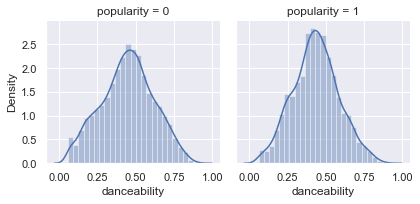

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


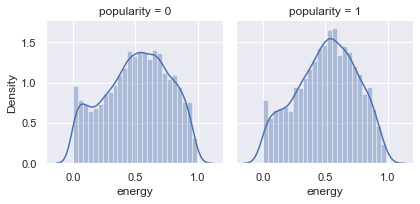

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


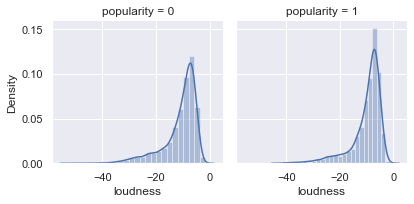

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


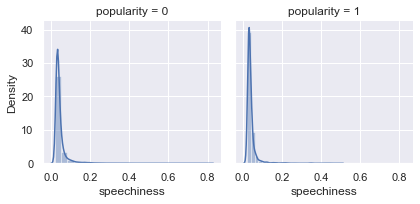

In [250]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


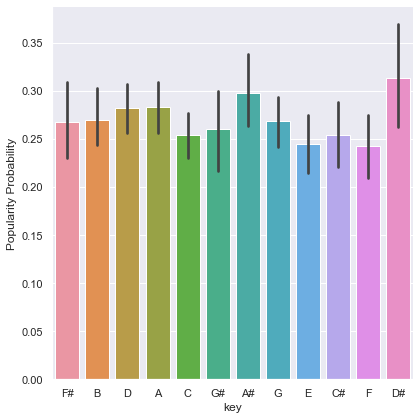

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


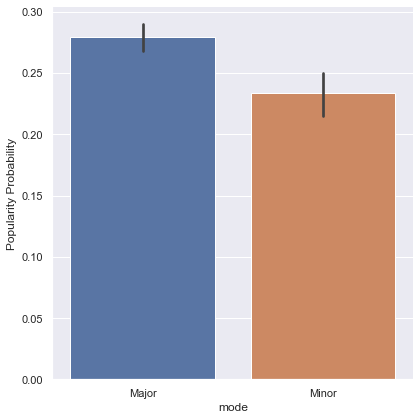

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


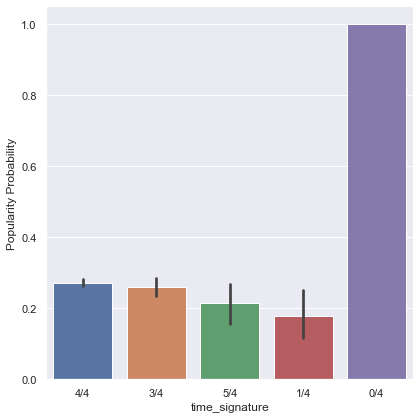

In [251]:
study_of_categorical_features(df_group_2)

In [252]:
df_group_2["key"] = (df_group_2["key"].map({"D" : 9, "F" : 1, "D#" : 12, "C#" : 3, "E" : 2, "C" : 4, "G" : 6, "A" : 10, "A#" : 11, "B" : 8, "G#" : 5, "F#" : 7})).astype('float')
df_group_2["mode"] = (df_group_2["mode"].map({"Minor" : 0, "Major" : 1})).astype('float')
df_group_2["time_signature"] = (df_group_2["time_signature"].map({"4/4" : 4, "3/4" : 3, "0/4" : 5, "1/4" : 1, "5/4" : 2})).astype('float')


C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/3719273530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_2["key"] = (df_group_2["key"].map({"D" : 9, "F" : 1, "D#" : 12, "C#" : 3, "E" : 2, "C" : 4, "G" : 6, "A" : 10, "A#" : 11, "B" : 8, "G#" : 5, "F#" : 7})).astype('float')
C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/3719273530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_2["mode"] = (df_group_2["mode"].map({"Minor" : 0, "Major" : 1})).astype('float')
C:\Users\Usuar

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


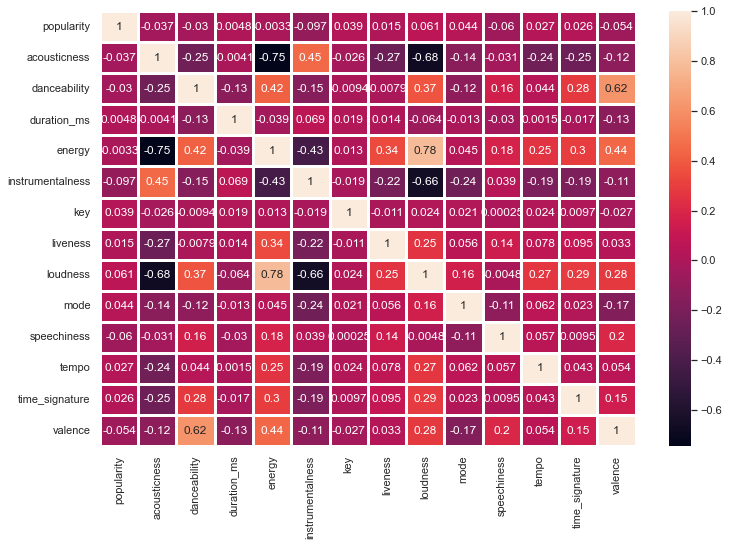

In [253]:
last_correlation_map(df_group_2)

### Modelling group 2

In [254]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression


In [255]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7351216652008209
precision:  0.0
recall:  0.0
[[1646    0]
 [ 628    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [257]:
downsampling(category_0, category_1)

(2435, 11)
(2435, 11)
accuracy: 0.5777656078860898
precision:  0.5506607929515418
recall:  0.6147540983606558
[[302 306]
 [235 375]]


###### Upsampling

In [258]:
upsampling(category_0, category_1)

(6661, 11)
(6661, 11)
accuracy: 0.5688119307376639
precision:  0.5345691382765531
recall:  0.6710691823899371
[[ 812  929]
 [ 523 1067]]


#### Random Forest Classifier


In [259]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 3, 'max_depth': None}


In [260]:
execute_Random_Forest(3,3,2,None,X_train_scaled, X_test_scaled, y_train, y_test)

0.9482556435063031


0    1646
1     628
Name: popularity, dtype: int64

precision:  0.5434782608695652
recall:  0.03980891719745223


array([[1625,   21],
       [ 603,   25]], dtype=int64)

###### Downsampling 

In [261]:
execute_Random_Forest_downsampling(3,3,2,None, category_0, category_1)

(2435, 11)
(2435, 11)
0.994249726177437


0    616
1    602
Name: popularity, dtype: int64

precision:  0.5640194489465153
recall:  0.5780730897009967


array([[347, 269],
       [254, 348]], dtype=int64)

###### Upsampling 

In [262]:
execute_Random_Forest_upsampling(3,3,2,None, category_0, category_1)

(6661, 11)
(6661, 11)
0.9949954959463517


0    1701
1    1630
Name: popularity, dtype: int64

precision:  0.8520710059171598
recall:  0.8834355828220859


array([[1451,  250],
       [ 190, 1440]], dtype=int64)

#### Decision Tree Classifier


In [263]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 2, 'max_depth': 3}


In [264]:
execute_Decision_tree_classifier(4,9,5,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7351216652008209


0    1646
1     628
Name: popularity, dtype: int64

precision:  0.0
recall:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1646,    0],
       [ 628,    0]], dtype=int64)

###### Downsampling 

In [265]:
execute_Decision_tree_classifier_downsampling(4,9,5,3, category_0, category_1)

(2435, 11)
(2435, 11)
0.5857064622124863


0    636
1    582
Name: popularity, dtype: int64

precision:  0.521889400921659
recall:  0.7783505154639175


array([[221, 415],
       [129, 453]], dtype=int64)

###### Upsampling 

In [266]:
execute_Decision_tree_classifier_upsampling(4,9,5,3, category_0, category_1)

(6661, 11)
(6661, 11)
0.580122109898909


1    1674
0    1657
Name: popularity, dtype: int64

precision:  0.5589687328579265
recall:  0.6087216248506571


array([[ 853,  804],
       [ 655, 1019]], dtype=int64)

In [267]:
# Conclusion: For group 2 we take the Random Forest Upsampling

# Looking at group 3

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


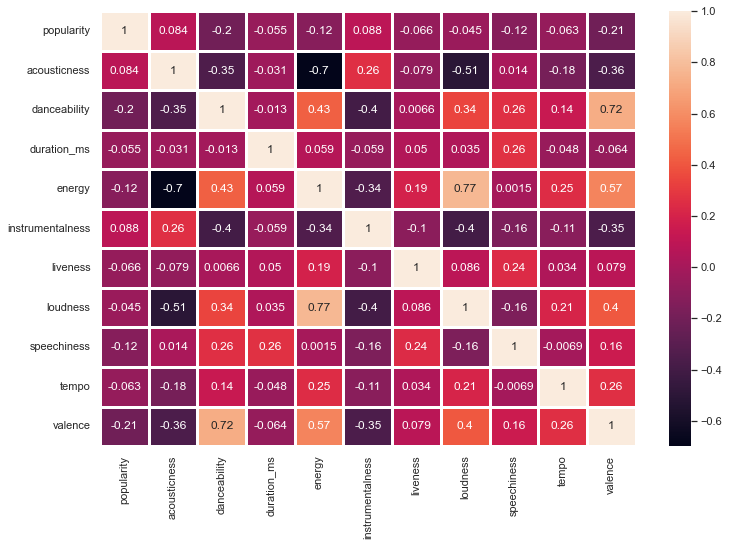

In [268]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_3)

## Studying the numerical features that are mostly related with popularity

In [269]:
list = ['acousticness','danceability','energy','instrumentalness','loudness','tempo']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


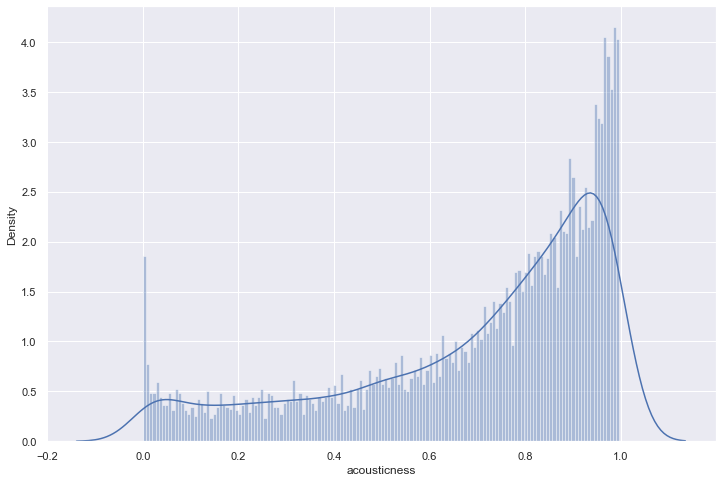

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


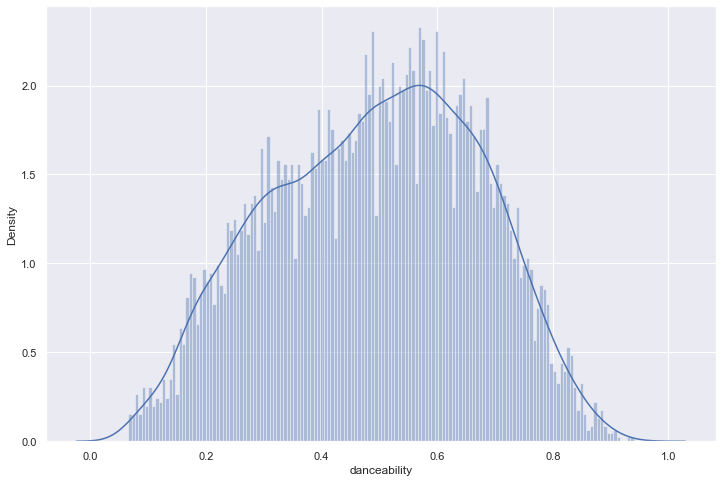

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


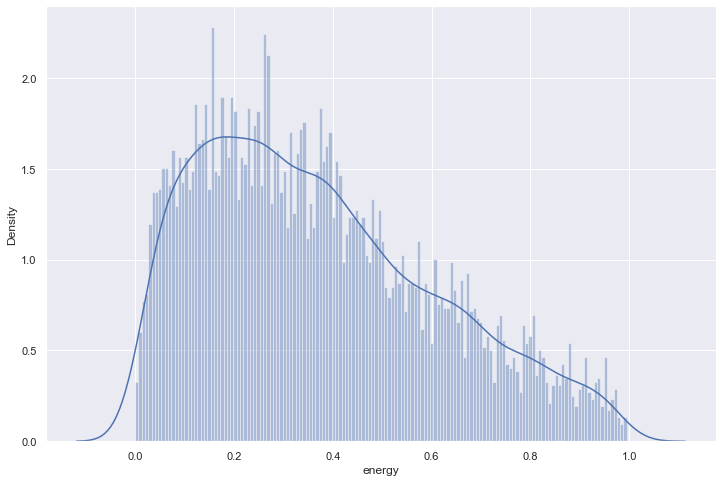

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


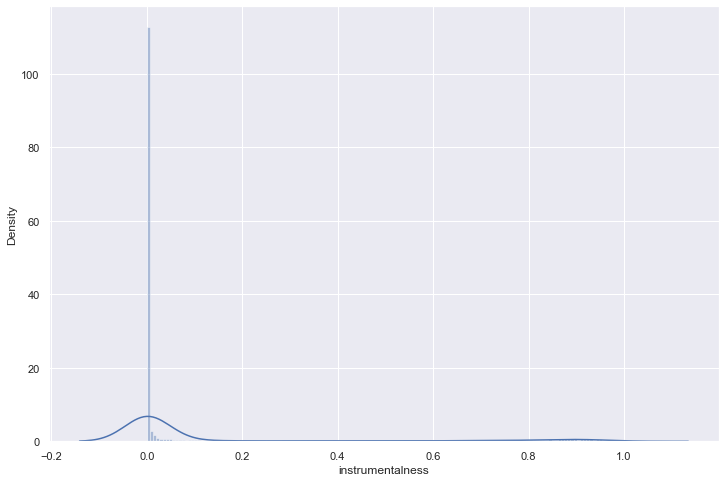

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


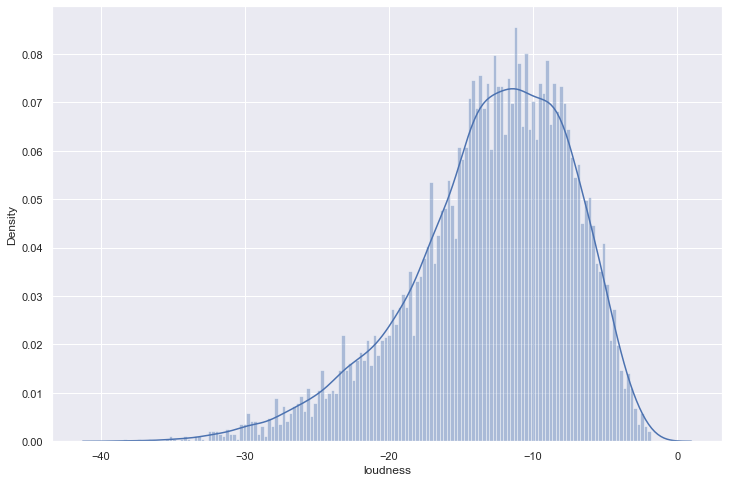

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


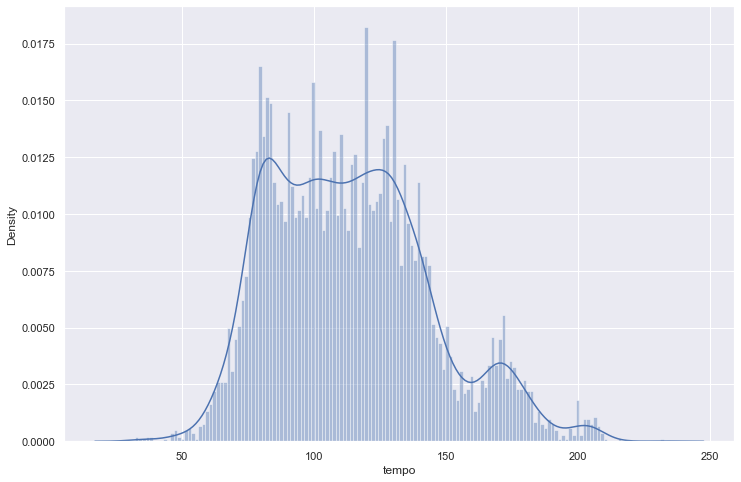

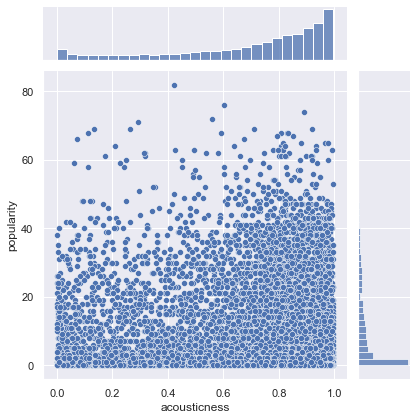

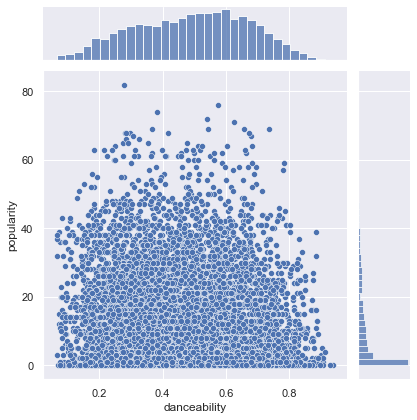

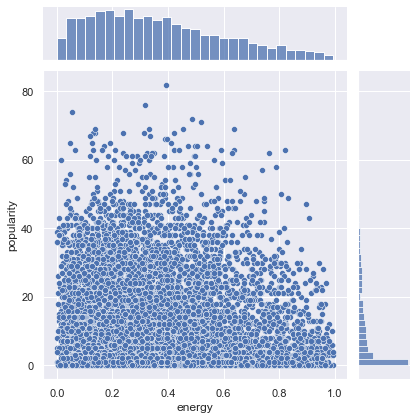

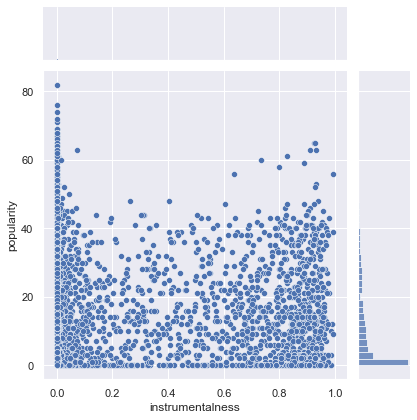

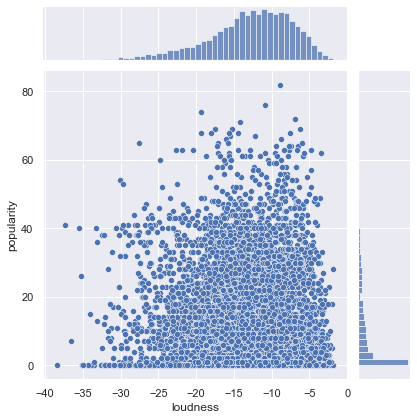

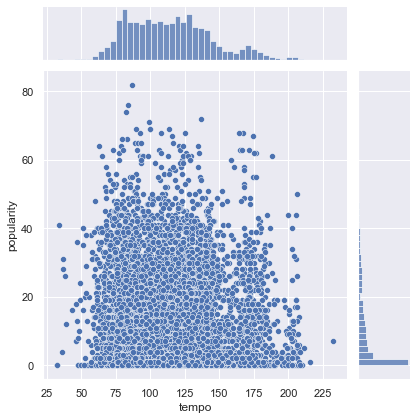

In [270]:
study_of_numerical_features_related_with_popularity(df_group_3)

## Looking more closely at popularity

### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


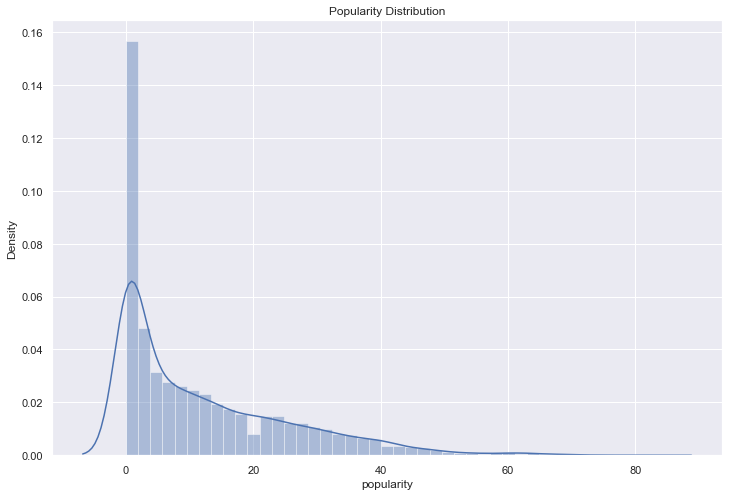

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


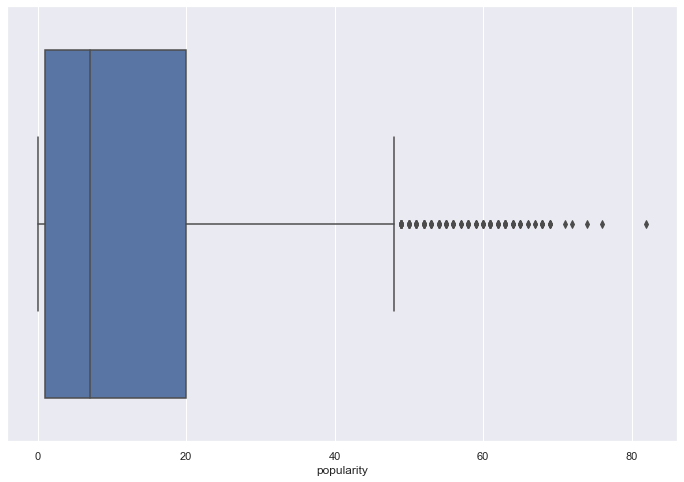

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


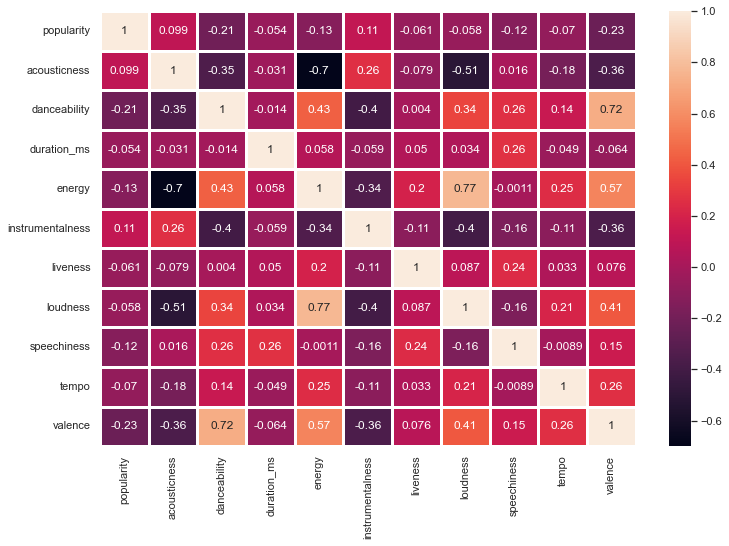

In [272]:
df_group_3_unnecesary = df_group_3.copy()

upper, lower, df_group_3_unnecesary = eliminate_outliers_of_popularity(df_group_3, numericals)

In [273]:
upper

20.0

In [274]:
# No improvement can be seen in the correlation

### Grouping popularity

In [275]:
# df_group_3_test = df_group_3.copy()

In [276]:
df_group_3['popularity'] = df_group_3['popularity'].apply(popularity_classification)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/2425200521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_3['popularity'] = df_group_3['popularity'].apply(popularity_classification)


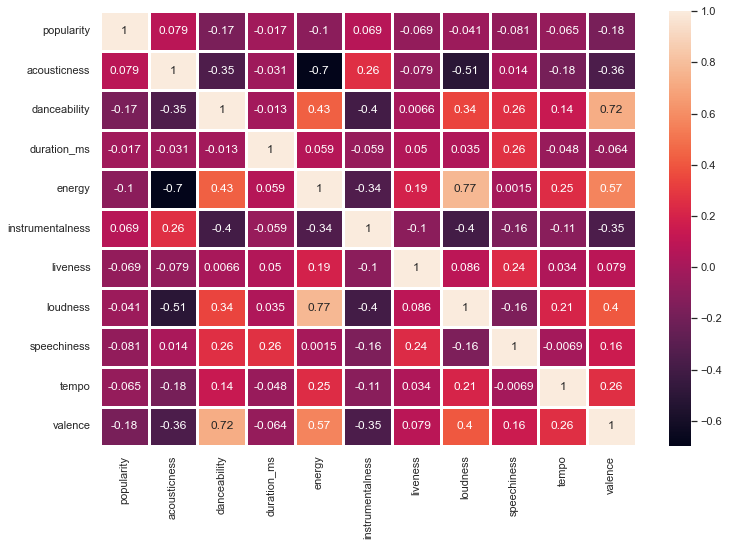

In [277]:
numericals_test = grouping_popularity(df_group_3)

In [278]:
# There is the same correlation for group 3 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


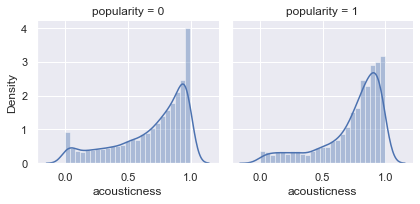

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


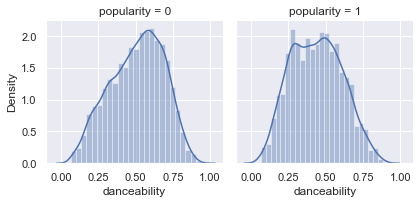

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


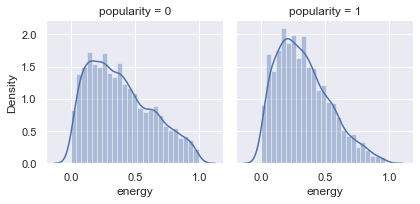

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


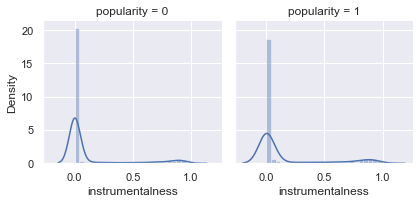

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


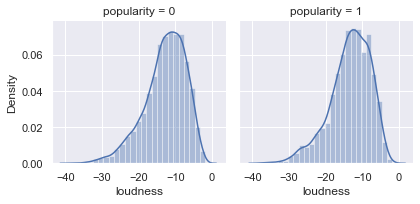

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


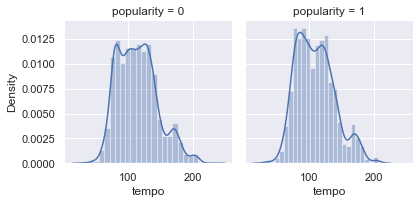

In [279]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


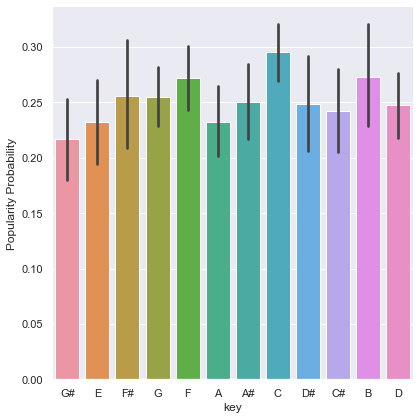

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


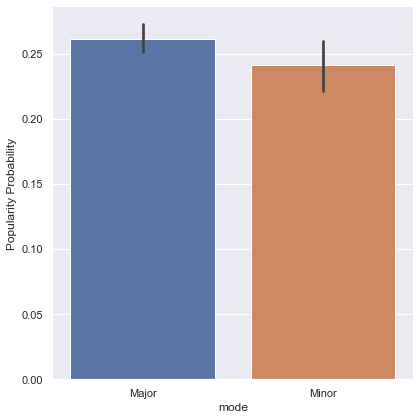

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


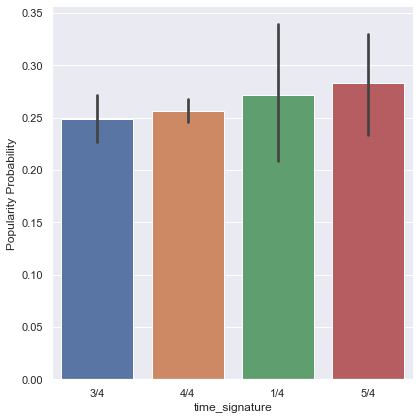

In [280]:
study_of_categorical_features(df_group_3)

In [281]:
df_group_3["key"] = (df_group_3["key"].map({"D" : 7 , "F" : 10, "D#" : 5, "C#" : 4, "E" : 2, "C" : 12, "G" : 8, "A" : 3, "A#" : 6, "B" : 11, "G#" : 1, "F#" : 9})).astype('float')
df_group_3["mode"] = (df_group_3["mode"].map({"Minor" : 0, "Major" : 1})).astype('float')
df_group_3["time_signature"] = (df_group_3["time_signature"].map({"4/4" : 2, "3/4" : 1, "1/4" : 3, "5/4" : 4})).astype('float')


C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/3025702857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_3["key"] = (df_group_3["key"].map({"D" : 7 , "F" : 10, "D#" : 5, "C#" : 4, "E" : 2, "C" : 12, "G" : 8, "A" : 3, "A#" : 6, "B" : 11, "G#" : 1, "F#" : 9})).astype('float')
C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/3025702857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_3["mode"] = (df_group_3["mode"].map({"Minor" : 0, "Major" : 1})).astype('float')
C:\Users\Usua

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


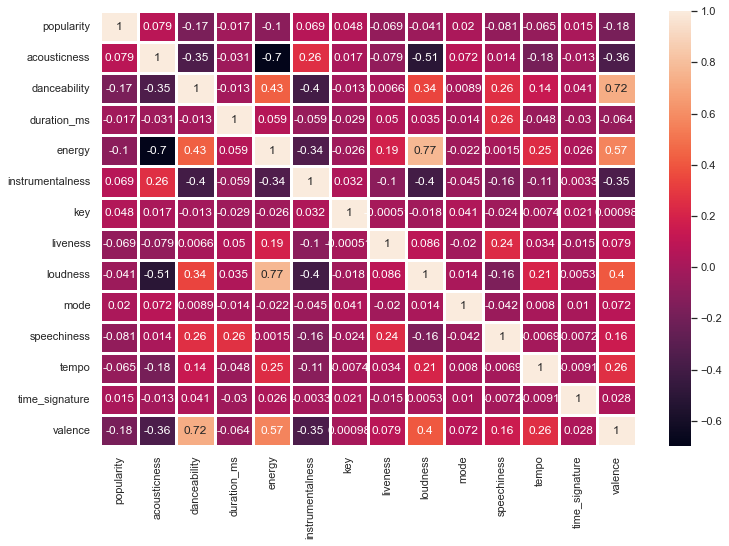

In [282]:
last_correlation_map(df_group_3)

### Modelling group 3

In [283]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression

In [284]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7417150666211137
precision:  0.0
recall:  0.0
[[1465    0]
 [ 487    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [285]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [286]:
downsampling(category_0, category_1)

(1999, 11)
(1999, 11)
accuracy: 0.5933955970647098
precision:  0.5996343692870201
recall:  0.6381322957198443
[[267 219]
 [186 328]]


###### Upsampling

In [287]:
upsampling(category_0, category_1)

(5807, 11)
(5807, 11)
accuracy: 0.5988518943742824
precision:  0.5934360348292029
recall:  0.6014935505770537
[[824 607]
 [587 886]]


#### Random Forest Classifier


In [288]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 5, 'max_depth': None}


In [289]:
execute_Random_Forest(6,7,3,None,X_train_scaled, X_test_scaled, y_train, y_test)

0.8568500170823369


0    1465
1     487
Name: popularity, dtype: int64

precision:  0.5689655172413793
recall:  0.06776180698151951


array([[1440,   25],
       [ 454,   33]], dtype=int64)

###### Downsampling 

In [290]:
execute_Random_Forest_downsampling(6,7,3,None, category_0, category_1)

(1999, 11)
(1999, 11)
0.9049366244162775


0    517
1    483
Name: popularity, dtype: int64

precision:  0.6294227188081937
recall:  0.6997929606625258


array([[318, 199],
       [145, 338]], dtype=int64)

###### Upsampling 

In [291]:
execute_Random_Forest_upsampling(6,7,3,None, category_0, category_1)

(5807, 11)
(5807, 11)
0.965556831228473


0    1489
1    1415
Name: popularity, dtype: int64

precision:  0.7837326607818411
recall:  0.8784452296819788


array([[1146,  343],
       [ 172, 1243]], dtype=int64)

#### Decision Tree Classifier


In [292]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 5, 'max_depth': 3}


In [293]:
execute_Decision_tree_classifier(10,4,5,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7417150666211137


0    1465
1     487
Name: popularity, dtype: int64

precision:  0.0
recall:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1465,    0],
       [ 487,    0]], dtype=int64)

###### Downsampling 

In [294]:
execute_Decision_tree_classifier_downsampling(10,4,5,3, category_0, category_1)

(1999, 11)
(1999, 11)
0.6150767178118746


0    506
1    494
Name: popularity, dtype: int64

precision:  0.539454806312769
recall:  0.7611336032388664


array([[185, 321],
       [118, 376]], dtype=int64)

###### Upsampling 

In [295]:
execute_Decision_tree_classifier_upsampling(10,4,5,3, category_0, category_1)

(5807, 11)
(5807, 11)
0.6081515499425947


0    1462
1    1442
Name: popularity, dtype: int64

precision:  0.5798365122615804
recall:  0.7378640776699029


array([[ 691,  771],
       [ 378, 1064]], dtype=int64)

In [296]:
# Conclusion: For group 3 we take the Random Forest Upsampling

# Looking at group 4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


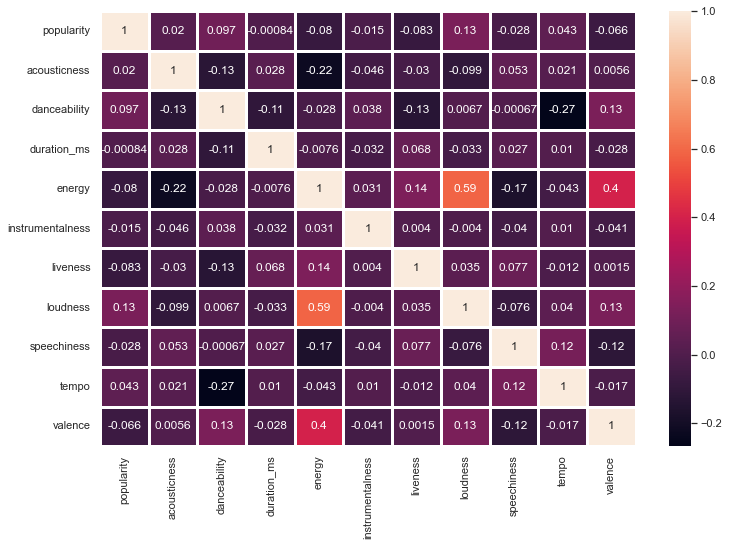

In [297]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_4)

## Studying the numerical features that are mostly related with popularity

In [298]:
list = ['energy']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


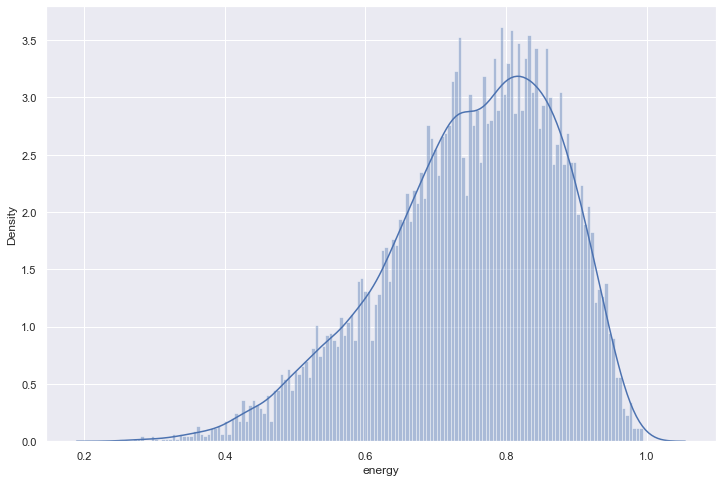

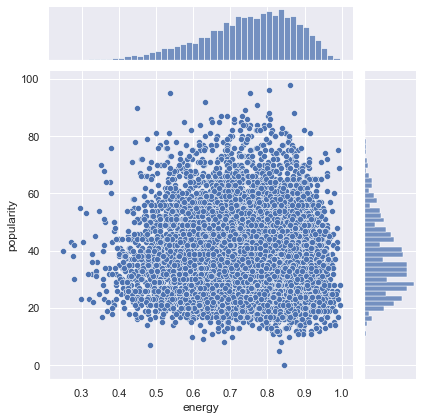

In [299]:
study_of_numerical_features_related_with_popularity(df_group_4)

## Looking more closely at popularity

### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


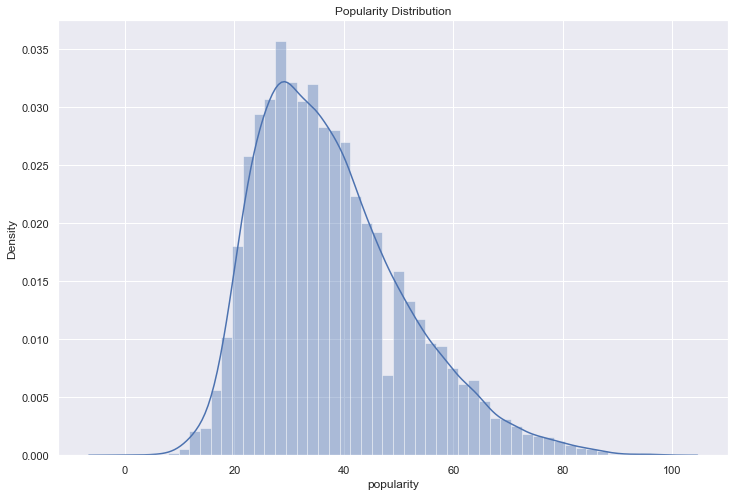

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


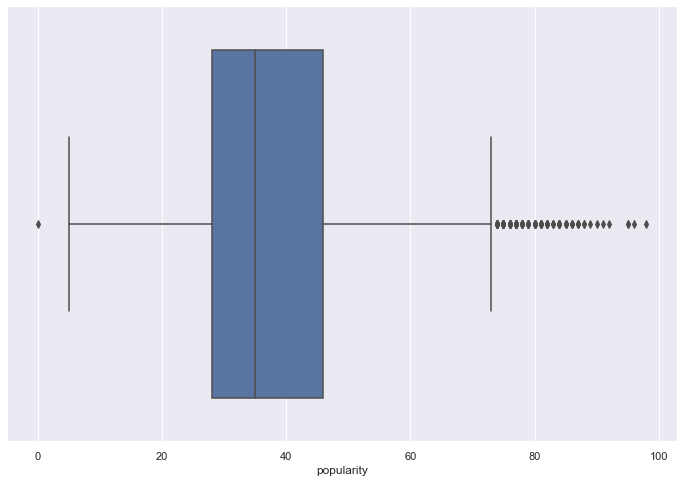

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


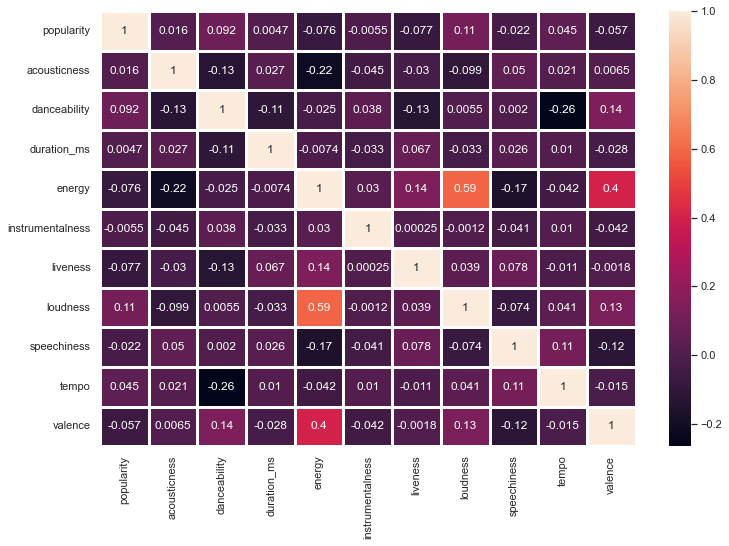

In [301]:
df_group_4_unnecesary = df_group_4.copy()

upper, lower, df_group_4_unnecesary = eliminate_outliers_of_popularity(df_group_4, numericals)

In [302]:
# No improvement can be seen in the correlation

### Grouping popularity

In [303]:
# df_group_4_test = df_group_4.copy()

In [304]:
df_group_4['popularity'] = df_group_4['popularity'].apply(popularity_classification)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/2135225360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_4['popularity'] = df_group_4['popularity'].apply(popularity_classification)


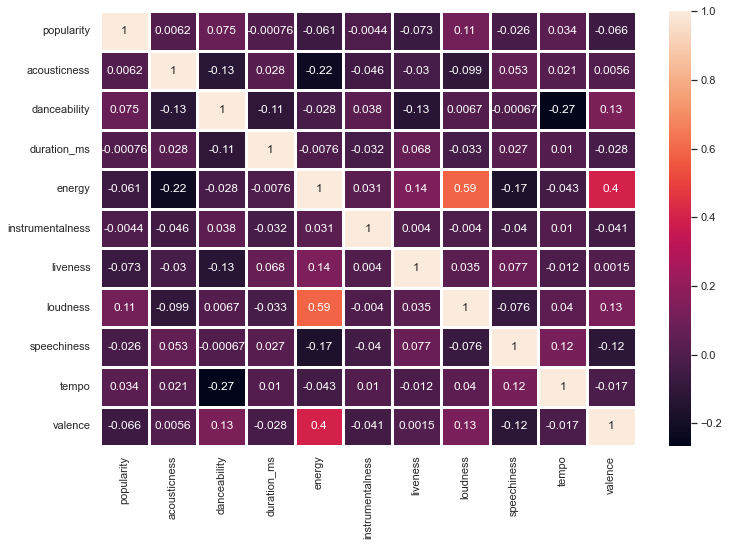

In [305]:
numericals_test = grouping_popularity(df_group_4)

In [306]:
# There is the same correlation for group 1 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


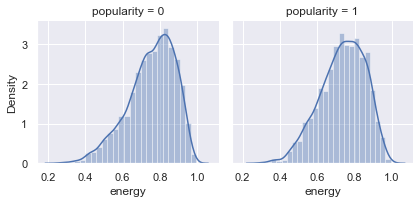

In [307]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


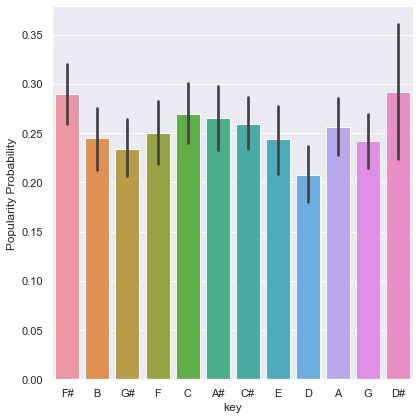

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


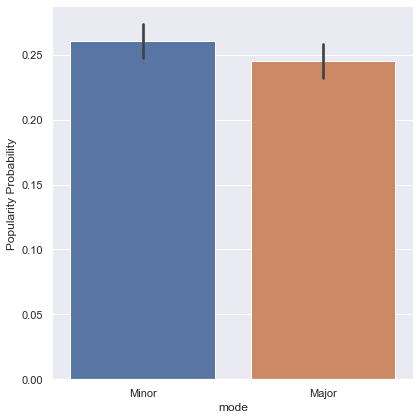

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


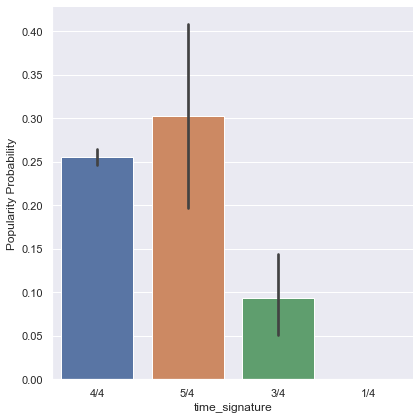

In [308]:
study_of_categorical_features(df_group_4)

In [309]:
df_group_4["key"] = (df_group_4["key"].map({"D" : 1, "F" : 6, "D#" : 12, "C#" : 8, "E" : 3, "C" : 10, "G" : 4, "A" : 7, "A#" : 9, "B" : 5, "G#" : 2, "F#" : 11})).astype('float')
df_group_4["mode"] = (df_group_4["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
df_group_4["time_signature"] = (df_group_4["time_signature"].map({"4/4" : 3, "3/4" : 2, "1/4" : 1, "5/4" : 4})).astype('float')


C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/955105427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_4["key"] = (df_group_4["key"].map({"D" : 1, "F" : 6, "D#" : 12, "C#" : 8, "E" : 3, "C" : 10, "G" : 4, "A" : 7, "A#" : 9, "B" : 5, "G#" : 2, "F#" : 11})).astype('float')
C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/955105427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_4["mode"] = (df_group_4["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
C:\Users\Usuario

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


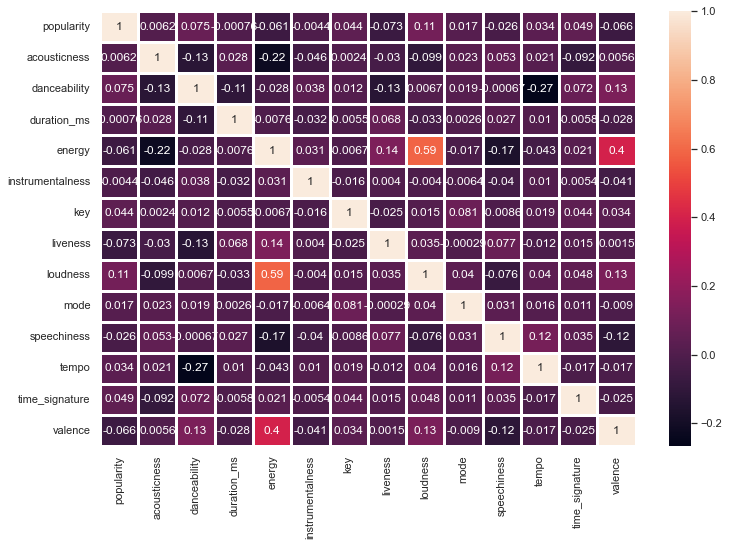

In [310]:
last_correlation_map(df_group_4)

### Modelling group 4

In [311]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression

In [312]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7441374159820762
precision:  0.5238095238095238
recall:  0.01936619718309859
[[1654   10]
 [ 557   11]]


In [313]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [314]:
downsampling(category_0, category_1)

(2256, 11)
(2256, 11)
accuracy: 0.5927895981087471
precision:  0.5940766550522648
recall:  0.6078431372549019
[[334 233]
 [220 341]]


###### Upsampling

In [315]:
upsampling(category_0, category_1)

(6671, 11)
(6671, 11)
accuracy: 0.6013391964821108
precision:  0.5964071856287425
recall:  0.594272076372315
[[986 674]
 [680 996]]


#### Random Forest Classifier


In [316]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': None}


In [317]:
execute_Random_Forest(9,6,3,None,X_train_scaled, X_test_scaled, y_train, y_test)

0.8531740104555638


0    1664
1     568
Name: popularity, dtype: int64

precision:  0.6415094339622641
recall:  0.05985915492957746


array([[1645,   19],
       [ 534,   34]], dtype=int64)

###### Downsampling 

In [318]:
execute_Random_Forest_downsampling(9,6,3,None, category_0, category_1)

(2256, 11)
(2256, 11)
0.9447399527186762


0    594
1    534
Name: popularity, dtype: int64

precision:  0.5993031358885017
recall:  0.6441947565543071


array([[364, 230],
       [190, 344]], dtype=int64)

###### Upsampling 

In [319]:
execute_Random_Forest_upsampling(9,6,3,None, category_0, category_1)

(6671, 11)
(6671, 11)
0.976514091545073


1    1741
0    1595
Name: popularity, dtype: int64

precision:  0.8521689497716894
recall:  0.8575531303848363


array([[1336,  259],
       [ 248, 1493]], dtype=int64)

#### Decision Tree Classifier


In [320]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 3, 'max_depth': 4}


In [321]:
execute_Decision_tree_classifier(10,2,2,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7478715459297983


0    1664
1     568
Name: popularity, dtype: int64

precision:  0.0
recall:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1664,    0],
       [ 568,    0]], dtype=int64)

###### Downsampling 

In [322]:
execute_Decision_tree_classifier_downsampling(10,2,2,3, category_0, category_1)

(2256, 11)
(2256, 11)
0.5605791962174941


1    582
0    546
Name: popularity, dtype: int64

precision:  0.55826859045505
recall:  0.8642611683848798


array([[148, 398],
       [ 79, 503]], dtype=int64)

###### Upsampling 

In [323]:
execute_Decision_tree_classifier_upsampling(10,2,2,3, category_0, category_1)

(6671, 11)
(6671, 11)
0.5692584449330402


0    1685
1    1651
Name: popularity, dtype: int64

precision:  0.5539885412075805
recall:  0.7613567534827377


array([[ 673, 1012],
       [ 394, 1257]], dtype=int64)

In [324]:
# Conclusion: For group 4 we take the Random Forest Upsampling

# Looking at group 5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


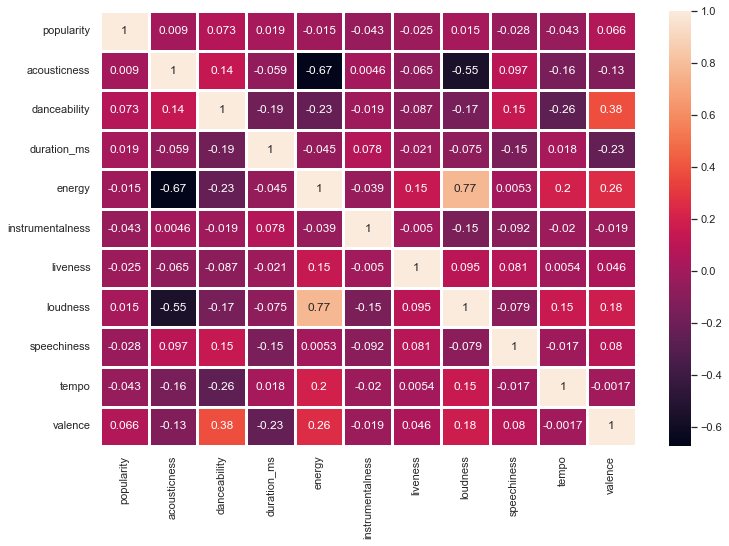

In [325]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_5)

In [326]:
list = ['danceability', 'energy']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


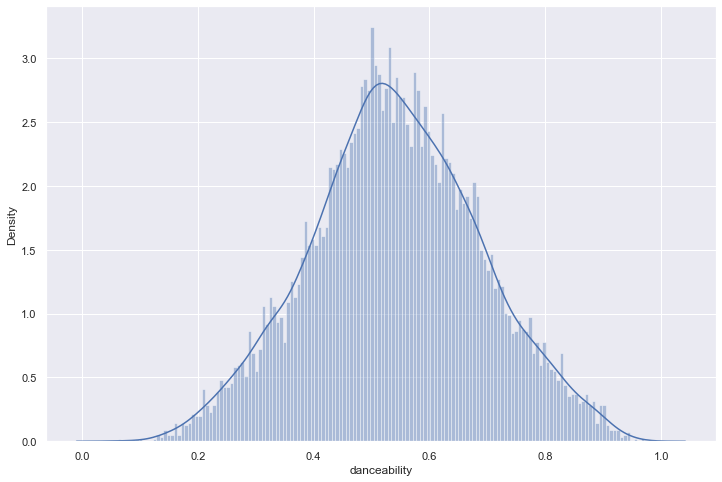

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


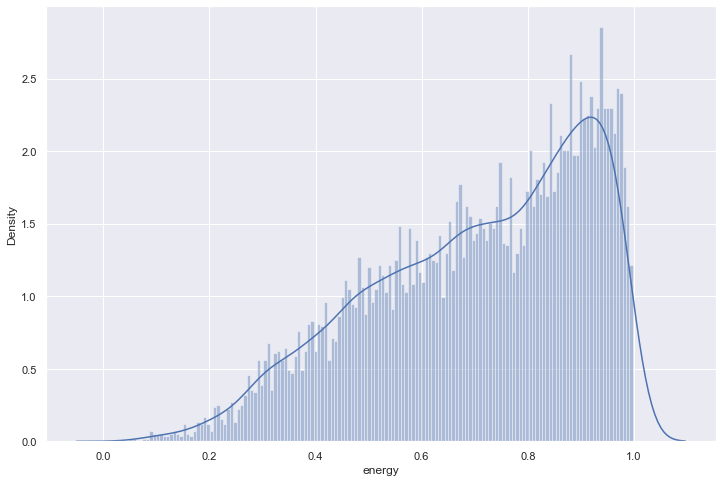

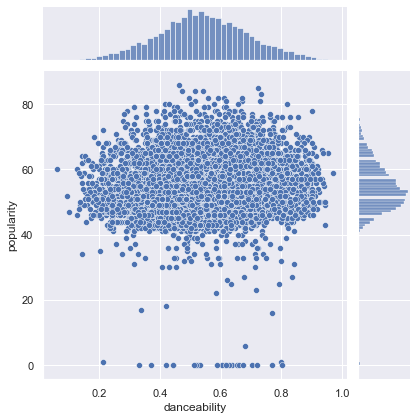

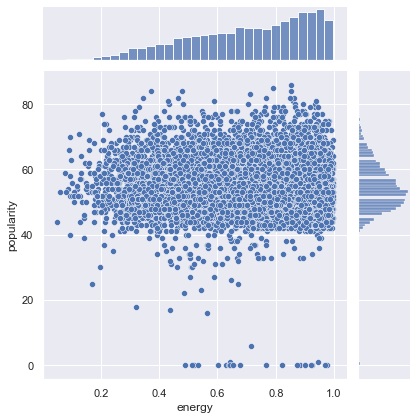

In [327]:
study_of_numerical_features_related_with_popularity(df_group_5)

## Looking more closely at popularity


### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


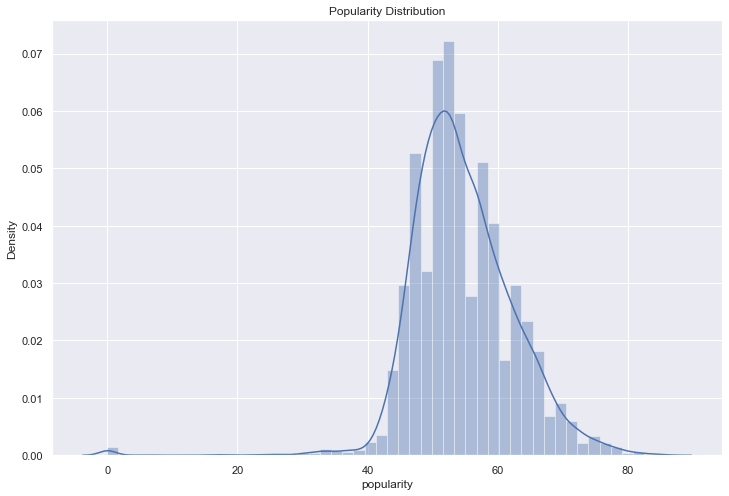

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


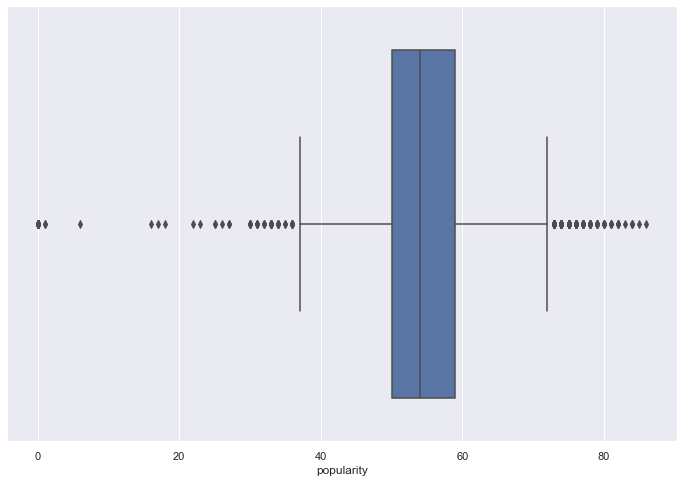

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


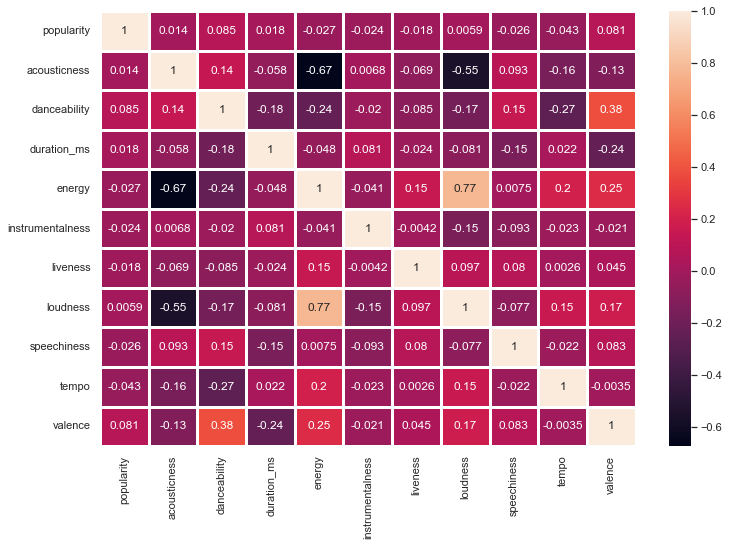

In [328]:
df_group_5_unnecesary = df_group_5.copy()
upper, lower, df_group_5 = eliminate_outliers_of_popularity(df_group_5, numericals)

In [329]:
# Results are very similar

In [330]:
# df_group_5_test = df_group_5.copy()

In [331]:
df_group_5['popularity'] = df_group_5['popularity'].apply(popularity_classification)

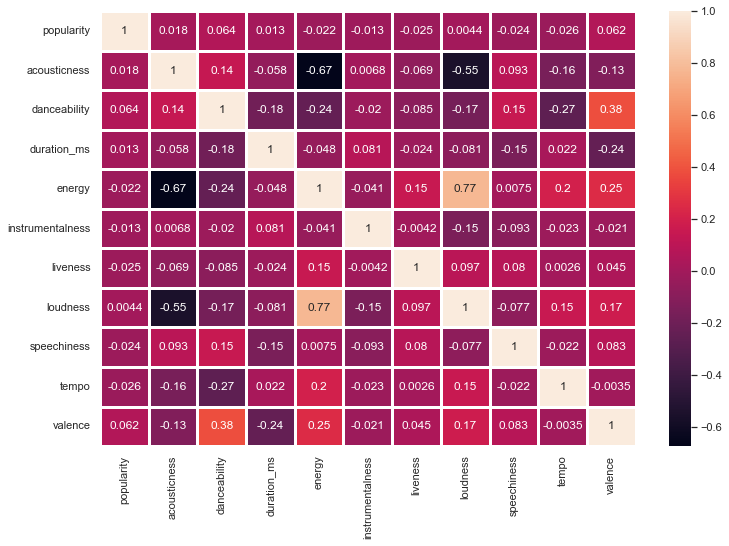

In [332]:
numericals_test = grouping_popularity(df_group_5)

In [333]:
# There is the same correlation for group 5 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


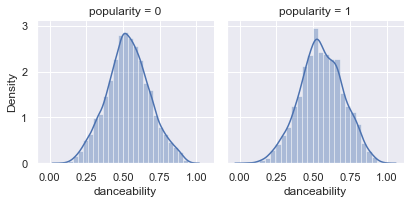

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


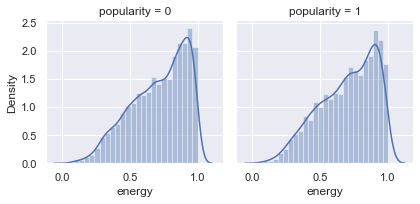

In [334]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


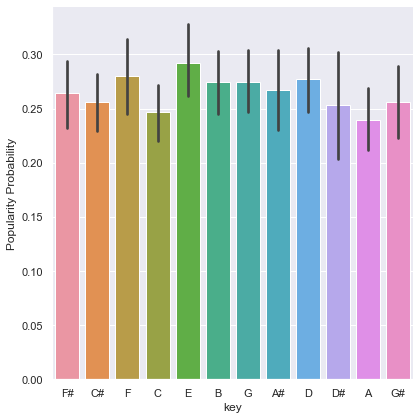

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


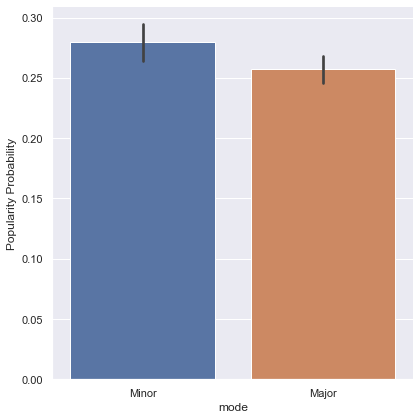

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


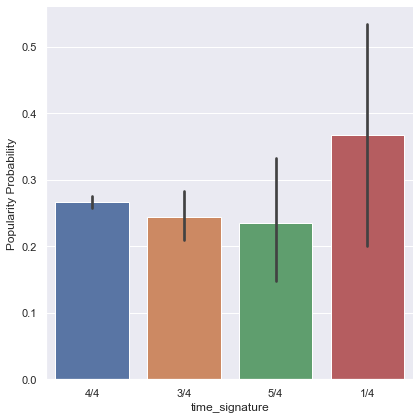

In [335]:
study_of_categorical_features(df_group_5)

In [336]:
df_group_5["key"] = (df_group_5["key"].map({"D" : 9, "F" : 11, "D#" : 5, "C#" : 4, "E" : 12, "C" : 1, "G" : 10, "A" : 2, "A#" : 7, "B" : 8, "G#" : 3, "F#" : 6})).astype('float')
df_group_5["mode"] = (df_group_5["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
df_group_5["time_signature"] = (df_group_5["time_signature"].map({"4/4" : 3, "3/4" : 2, "1/4" : 4, "5/4" : 1})).astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


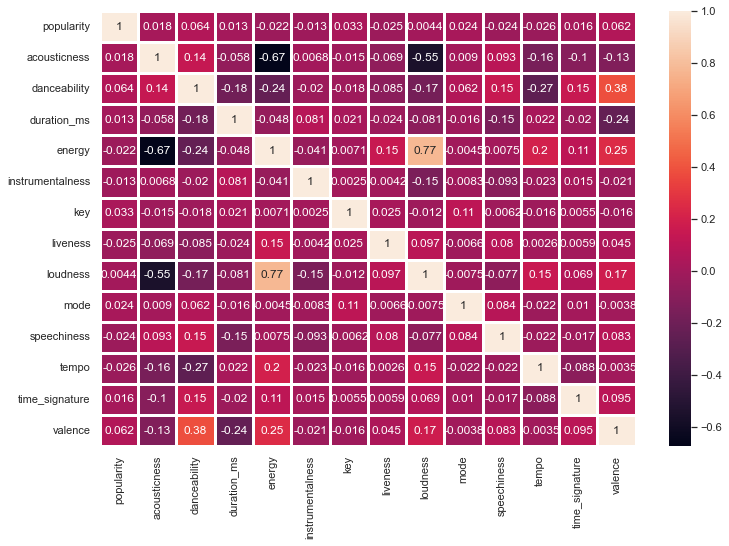

In [337]:
last_correlation_map(df_group_5)

### Modelling group 5


In [338]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression


In [339]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7330601492755744
precision:  0.0
recall:  0.0
[[1686    0]
 [ 592    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Managing imbalance in the dataset

In [340]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [341]:
downsampling(category_0, category_1)

(2416, 11)
(2416, 11)
accuracy: 0.5463576158940397
precision:  0.5531914893617021
recall:  0.514003294892916
[[349 252]
 [295 312]]


###### Upsampling

In [342]:
upsampling(category_0, category_1)

(6695, 11)
(6695, 11)
accuracy: 0.5472017526389166
precision:  0.5595311536088834
recall:  0.5373222748815166
[[946 714]
 [781 907]]


#### Random Forest Classifier


In [343]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 6, 'max_depth': 4}


In [344]:
execute_Random_Forest(2,9,3,None,X_train_scaled, X_test_scaled, y_train, y_test)

0.7645250987853066


0    1686
1     592
Name: popularity, dtype: int64

precision:  1.0
recall:  0.005067567567567568


array([[1686,    0],
       [ 589,    3]], dtype=int64)

###### Downsampling 

In [345]:
execute_Random_Forest_downsampling(2,9,3,None, category_0, category_1)

(2416, 11)
(2416, 11)
0.9381898454746137


0    607
1    601
Name: popularity, dtype: int64

precision:  0.5397350993377483
recall:  0.5424292845257903


array([[329, 278],
       [275, 326]], dtype=int64)

###### Upsampling 

In [346]:
execute_Random_Forest_upsampling(2,9,3,None, category_0, category_1)

(6695, 11)
(6695, 11)
0.966938856801434


0    1702
1    1646
Name: popularity, dtype: int64

precision:  0.7994169096209912
recall:  0.8329283110571082


array([[1358,  344],
       [ 275, 1371]], dtype=int64)

#### Decision Tree Classifier

In [347]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 2, 'max_depth': 3}


In [348]:
execute_Decision_tree_classifier(2,4,2,4, X_train_scaled, X_test_scaled, y_train, y_test)


0.7330601492755744


0    1686
1     592
Name: popularity, dtype: int64

precision:  0.0
recall:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1686,    0],
       [ 592,    0]], dtype=int64)

###### Downsampling 

In [349]:
execute_Decision_tree_classifier_downsampling(2,4,2,4, category_0, category_1)

(2416, 11)
(2416, 11)
0.5653973509933775


1    614
0    594
Name: popularity, dtype: int64

precision:  0.5329512893982808
recall:  0.30293159609120524


array([[431, 163],
       [428, 186]], dtype=int64)

###### Upsampling 

In [350]:
execute_Decision_tree_classifier_upsampling(2,4,2,4, category_0, category_1)

(6695, 11)
(6695, 11)
0.5621390161322446


1    1678
0    1670
Name: popularity, dtype: int64

precision:  0.5316135558927668
recall:  0.6263408820023838


array([[ 744,  926],
       [ 627, 1051]], dtype=int64)

In [351]:
# Conclusion: For group 5 we take the Random Forest Upsampling

# Looking at group 6

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


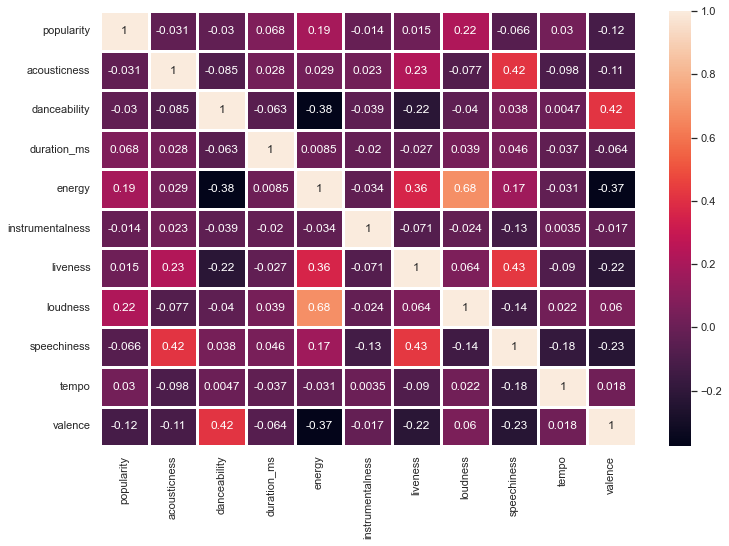

In [352]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_6)

## Studying the numerical features that are mostly related with popularity


In [355]:
list = ['danceability','energy']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


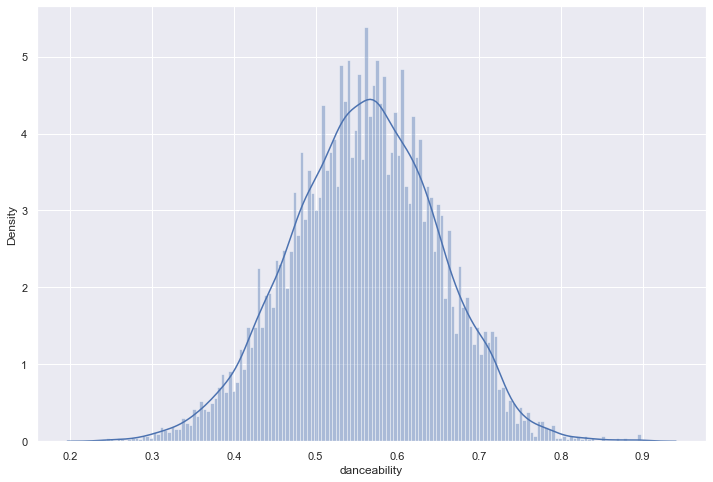

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


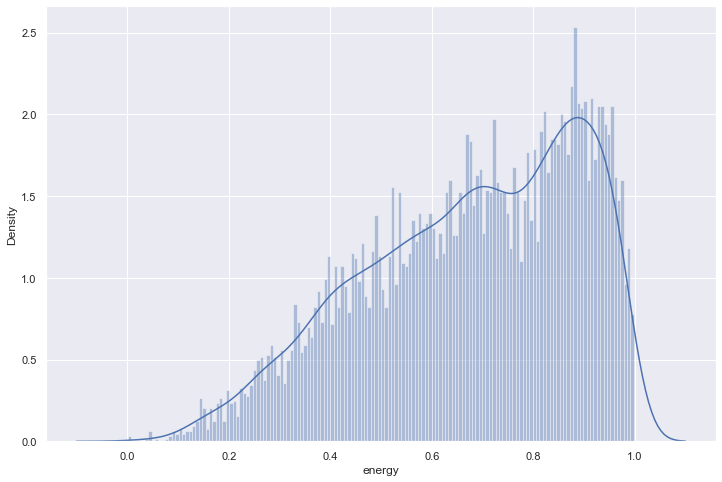

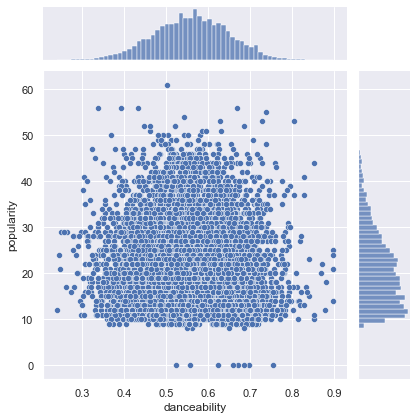

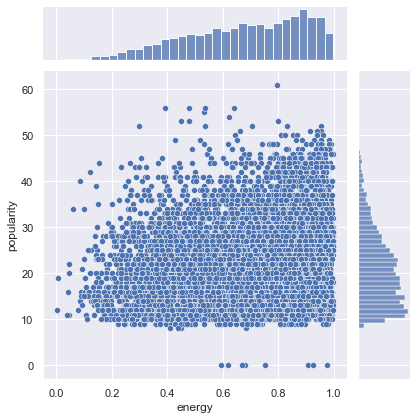

In [356]:
study_of_numerical_features_related_with_popularity(df_group_6)

## Looking more closely at popularity


### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


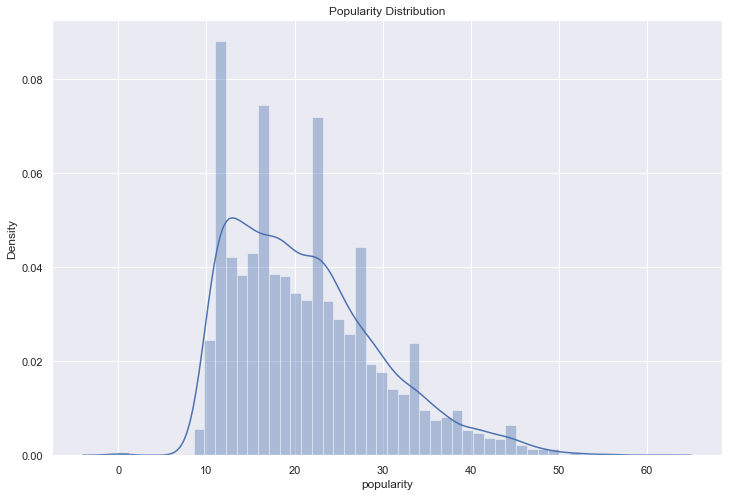

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


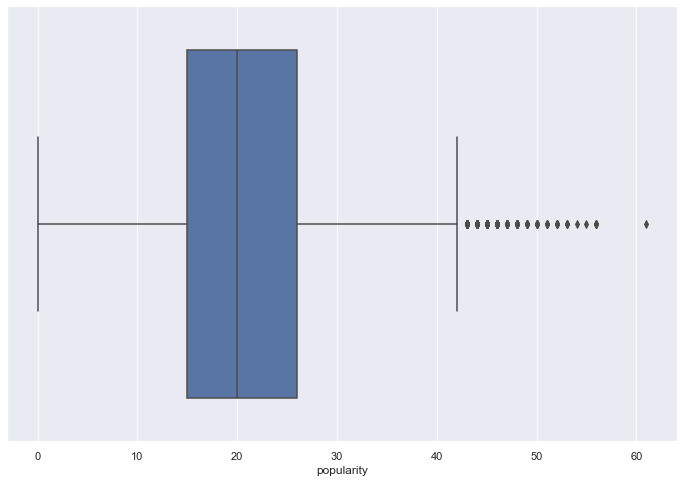

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


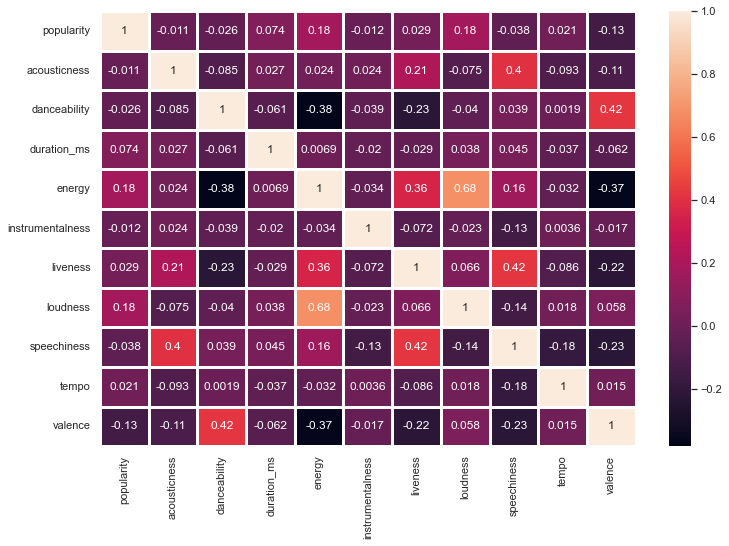

In [357]:
df_group_6_unnecesary = df_group_6.copy()

upper, lower, df_group_6_unnecesary = eliminate_outliers_of_popularity(df_group_6, numericals)

In [358]:
# No improvement can be seen in the correlation

### Grouping popularity

In [359]:
# df_group_6_test = df_group_6.copy()

In [360]:
df_group_6['popularity'] = df_group_6['popularity'].apply(popularity_classification)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/1856196009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_6['popularity'] = df_group_6['popularity'].apply(popularity_classification)


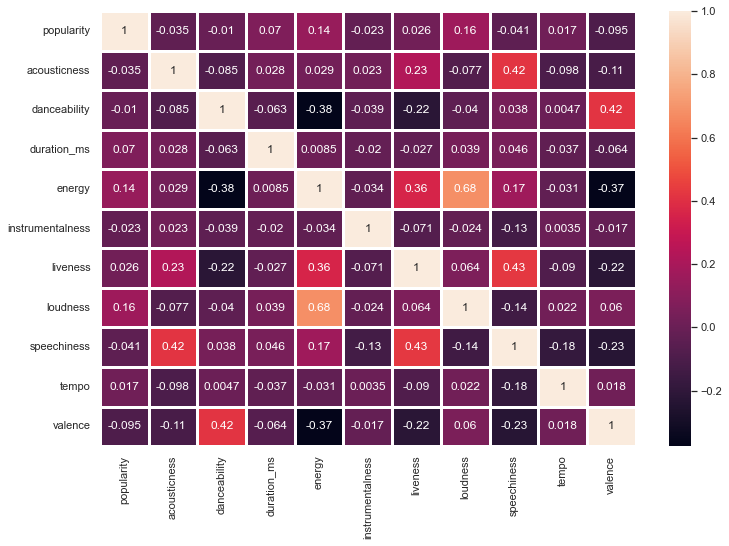

In [361]:
numericals_test = grouping_popularity(df_group_6)

In [362]:
# There is the same correlation for group 6 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


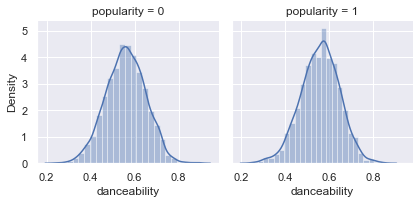

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


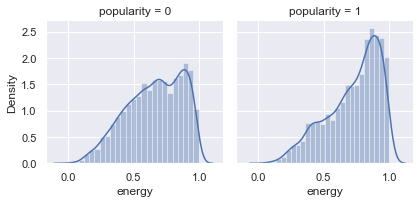

In [363]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


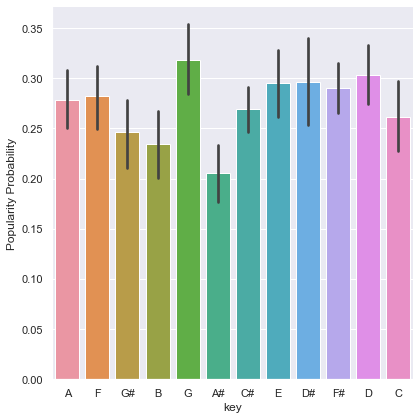

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


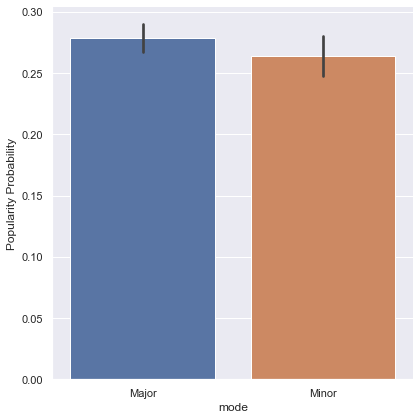

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


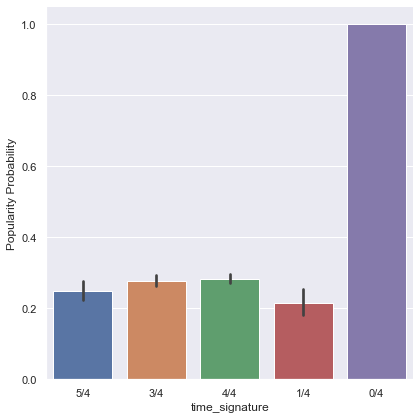

In [364]:
study_of_categorical_features(df_group_6)

In [365]:
df_group_6["key"] = (df_group_6["key"].map({"D" : 11, "F" : 7, "D#" : 10, "C#" : 6, "E" : 9, "C" : 4, "G" : 12, "A" : 5, "A#" : 1, "B" : 2, "G#" : 3, "F#" : 8})).astype('float')
df_group_6["mode"] = (df_group_6["mode"].map({"Minor" : 0, "Major" : 1})).astype('float')
df_group_6["time_signature"] = (df_group_6["time_signature"].map({"4/4" : 4, "3/4" : 3, "0/4" : 5, "1/4" : 1, "5/4" : 2})).astype('float')


C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/1676421881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_6["key"] = (df_group_6["key"].map({"D" : 11, "F" : 7, "D#" : 10, "C#" : 6, "E" : 9, "C" : 4, "G" : 12, "A" : 5, "A#" : 1, "B" : 2, "G#" : 3, "F#" : 8})).astype('float')
C:\Users\Usuario\AppData\Local\Temp/ipykernel_12492/1676421881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_6["mode"] = (df_group_6["mode"].map({"Minor" : 0, "Major" : 1})).astype('float')
C:\Users\Usuar

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


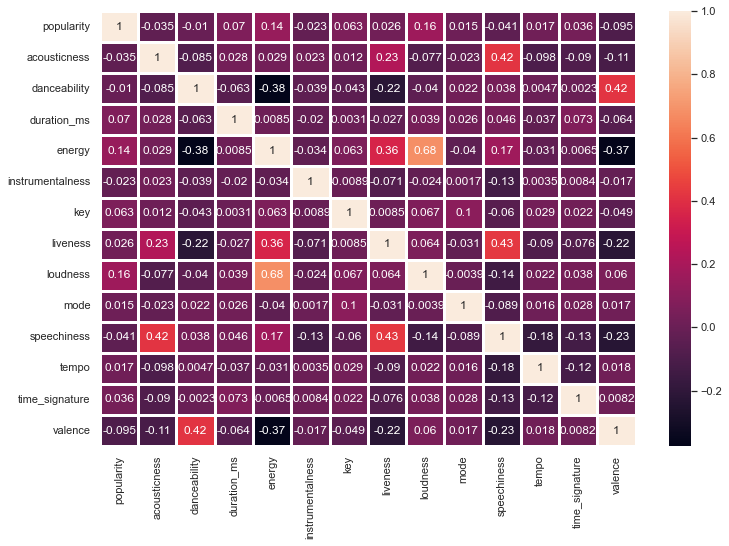

In [366]:
last_correlation_map(df_group_6)

### Modelling group 6


In [367]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression


In [368]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7294765840220385
precision:  0.4583333333333333
recall:  0.016152716593245228
[[1727   13]
 [ 670   11]]


In [369]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling


In [370]:
downsampling(category_0, category_1)

(2653, 11)
(2653, 11)
accuracy: 0.6076903744659462
precision:  0.5791788856304986
recall:  0.6021341463414634
[[384 287]
 [261 395]]


###### Upsampling

In [371]:
upsampling(category_0, category_1)

(7028, 11)
(7028, 11)
accuracy: 0.603870233352305
precision:  0.5848660010509722
recall:  0.649737302977233
[[1011  790]
 [ 600 1113]]


#### Random Forest Classifier


In [372]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 5, 'max_depth': None}


In [373]:
execute_Random_Forest(3,6,6,None,X_train_scaled, X_test_scaled, y_train, y_test)

0.890495867768595


0    1740
1     681
Name: popularity, dtype: int64

precision:  0.5875
recall:  0.13803230543318648


array([[1674,   66],
       [ 587,   94]], dtype=int64)

###### Downsampling 

In [374]:
execute_Random_Forest_downsampling(3,6,6,None, category_0, category_1)

(2653, 11)
(2653, 11)
0.9421965317919075


1    689
0    638
Name: popularity, dtype: int64

precision:  0.6714060031595577
recall:  0.6168359941944848


array([[430, 208],
       [264, 425]], dtype=int64)

###### Upsampling 

In [375]:
execute_Random_Forest_upsampling(3,6,6,None, category_0, category_1)

(7028, 11)
(7028, 11)
0.9760007588692847


0    1769
1    1745
Name: popularity, dtype: int64

precision:  0.8141126908899421
recall:  0.8859598853868195


array([[1416,  353],
       [ 199, 1546]], dtype=int64)

#### Decision Tree Classifier


In [376]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 3}


In [377]:
execute_Decision_tree_classifier(5,8,5,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7333333333333333


0    1740
1     681
Name: popularity, dtype: int64

precision:  0.45161290322580644
recall:  0.041116005873715125


array([[1706,   34],
       [ 653,   28]], dtype=int64)

###### Downsampling 

In [378]:
execute_Decision_tree_classifier_downsampling(5,8,5,3, category_0, category_1)

(2653, 11)
(2653, 11)
0.6177431515456144


1    671
0    656
Name: popularity, dtype: int64

precision:  0.5893939393939394
recall:  0.5797317436661699


array([[385, 271],
       [282, 389]], dtype=int64)

###### Upsampling 

In [379]:
execute_Decision_tree_classifier_upsampling(5,8,5,3, category_0, category_1)

(7028, 11)
(7028, 11)
0.6144944033390248


1    1816
0    1698
Name: popularity, dtype: int64

precision:  0.6241651487553127
recall:  0.566079295154185


array([[1079,  619],
       [ 788, 1028]], dtype=int64)

In [380]:
# Conclusion: For group 6 we take the Random Forest Upsampling

# Create a CSV with updated popularity

In [381]:
df_final = pd.concat([df_group_1, df_group_2, df_group_3, df_group_4, df_group_5, df_group_6], axis = 0)
df_final.columns = ['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']
df_final.to_csv('Songs_Tableau.csv', index = False)